# Sección nueva

<div class="markdown-google-sans">

1.   Elemento de la lista
2.   Elemento de la lista


  <h1>Te damos la bienvenida a Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Nuevo&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Si ya conoces Colab, mira este video para aprender sobre las tablas interactivas, la vista histórica de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  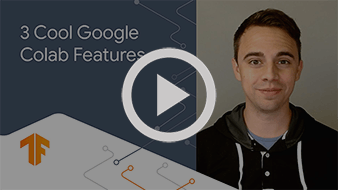
  </a>
</center>

<div class="markdown-google-sans">
  <h2>¿Qué es Colab?</h2>
</div>

Colab, o "Colaboratory", te permite escribir y ejecutar código de Python en tu navegador, con
- Sin configuración requerida
- Acceso sin costo a GPU
- Facilidad para compartir

Seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>, Colab facilita tu trabajo. Mira <a href="https://www.youtube.com/watch?v=inN8seMm7UI">este video introductorio sobre Colab</a> para obtener más información, o bien comienza a usarlo más abajo.

<div class="markdown-google-sans">

## <strong>Introducción</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>notebook de Colab</strong>, que permite escribir y ejecutar código.

Por ejemplo, esta es una <strong>celda de código</strong> con una secuencia de comandos Python corta que calcula un valor, lo almacena en una variable y devuelve el resultado:

# Sección nueva

Saving Carbono Total1.xlsx to Carbono Total1 (2).xlsx
Nombres de columnas después de normalización:
['bloque', 'tratamiento', 'carbonototal']

Tabla ANOVA:
                  sum_sq   df         F    PR(>F)
tratamiento  2715.020833  1.0  6.098430  0.035599
bloque         29.348643  1.0  0.065922  0.803142
Residual     4006.799690  9.0       NaN       NaN

Prueba de Tukey:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1     group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Pasto  Silvopastoreo  30.0833 0.0268 4.239 55.9277   True
---------------------------------------------------------


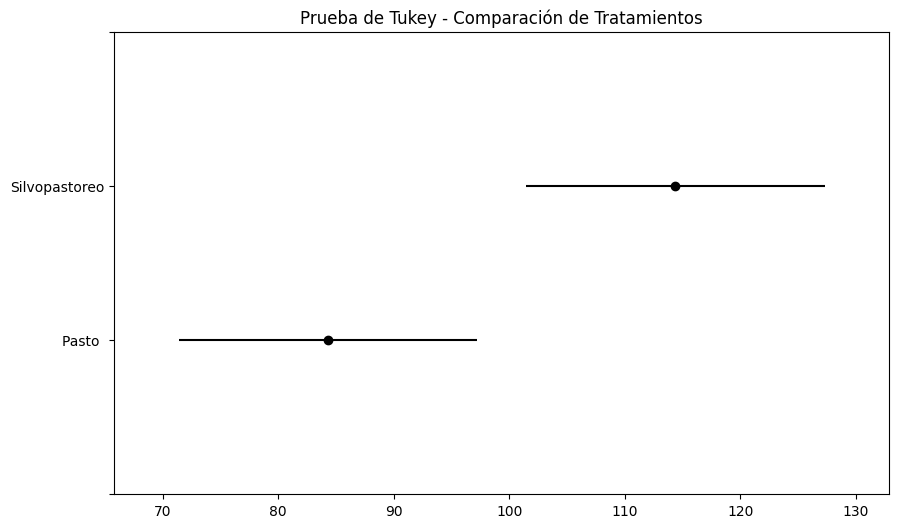

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo desde el equipo
uploaded = files.upload()  # Subir archivo

# Paso 3: Leer el archivo Excel cargado
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Paso 4: Normalizar los nombres de las columnas (elimina espacios y convierte a minúsculas)
data.columns = data.columns.str.strip().str.lower()

# Paso 5: Inspeccionar nombres normalizados
print("Nombres de columnas después de normalización:")
print(data.columns.tolist())

# Paso 6: Buscar las columnas relevantes basadas en los nombres normalizados
try:
    # Seleccionar las columnas utilizando nombres normalizados
    data = data[['bloque', 'tratamiento', 'carbonototal']].dropna()
except KeyError as e:
    print(f"Error: {e}")
    print("Asegúrate de que las columnas sean 'bloque', 'tratamiento' y 'carbonototal' (sin espacios).")
    raise

# Paso 7: Convertir la columna de Carbonototal a numérico
data['carbonototal'] = pd.to_numeric(data['carbonototal'], errors='coerce')

# Paso 8: ANOVA
modelo = ols('carbonototal ~ tratamiento + bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Paso 9: Prueba de Tukey
tukey = pairwise_tukeyhsd(data['carbonototal'], data['tratamiento'], alpha=0.05)
print("\nPrueba de Tukey:")
print(tukey)

# Paso 10: Gráfico de Tukey
tukey.plot_simultaneous()
plt.title("Prueba de Tukey - Comparación de Tratamientos")
plt.show()

Saving Carbono Total1.xlsx to Carbono Total1 (5).xlsx
Nombres de columnas después de normalización:
['bloque', 'tratamiento', 'carbonototal']

Tabla ANOVA:
                  sum_sq   df         F    PR(>F)
tratamiento  2715.020833  1.0  6.098430  0.035599
bloque         29.348643  1.0  0.065922  0.803142
Residual     4006.799690  9.0       NaN       NaN

Prueba de Tukey:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1     group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Pasto  Silvopastoreo  30.0833 0.0268 4.239 55.9277   True
---------------------------------------------------------


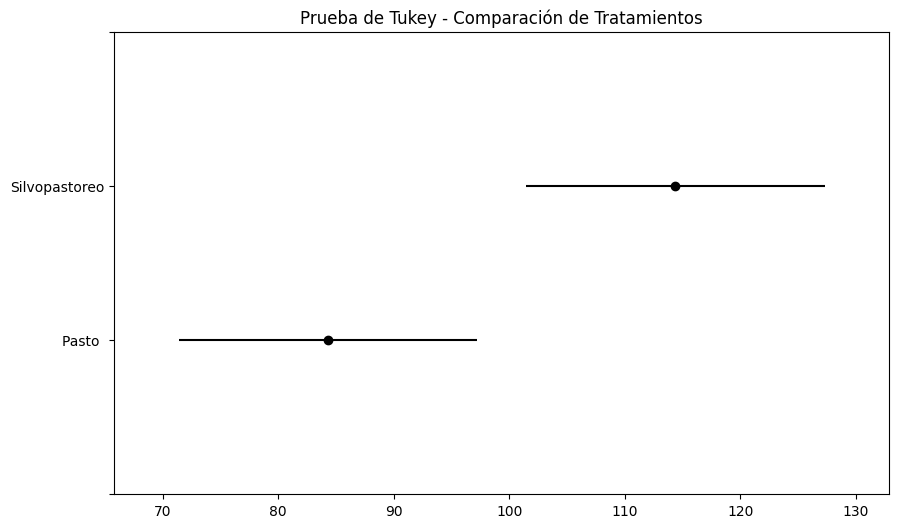

<ipython-input-6-0d7b278ce55e>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tratamiento', y='carbonototal', data=data, palette="Set2")


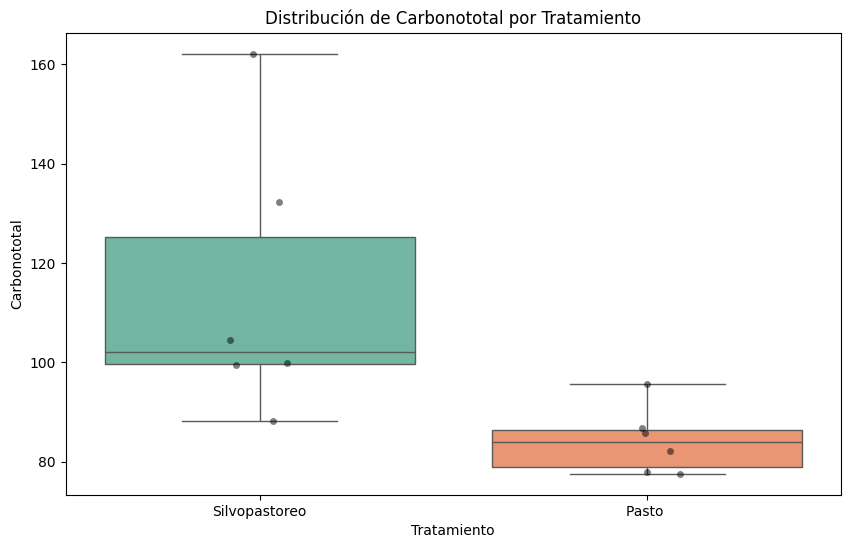

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn para un mejor diseño del boxplot

# Paso 2: Cargar el archivo desde el equipo
uploaded = files.upload()  # Subir archivo

# Paso 3: Leer el archivo Excel cargado
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Paso 4: Normalizar los nombres de las columnas (elimina espacios y convierte a minúsculas)
data.columns = data.columns.str.strip().str.lower()

# Paso 5: Inspeccionar nombres normalizados
print("Nombres de columnas después de normalización:")
print(data.columns.tolist())

# Paso 6: Buscar las columnas relevantes basadas en los nombres normalizados
try:
    # Seleccionar las columnas utilizando nombres normalizados
    data = data[['bloque', 'tratamiento', 'carbonototal']].dropna()
except KeyError as e:
    print(f"Error: {e}")
    print("Asegúrate de que las columnas sean 'bloque', 'tratamiento' y 'carbonototal' (sin espacios).")
    raise

# Paso 7: Convertir la columna de Carbonototal a numérico
data['carbonototal'] = pd.to_numeric(data['carbonototal'], errors='coerce')

# Paso 8: ANOVA
modelo = ols('carbonototal ~ tratamiento + bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Paso 9: Prueba de Tukey
tukey = pairwise_tukeyhsd(data['carbonototal'], data['tratamiento'], alpha=0.05)
print("\nPrueba de Tukey:")
print(tukey)

# Paso 10: Gráfico de Tukey
tukey.plot_simultaneous()
plt.title("Prueba de Tukey - Comparación de Tratamientos")
plt.show()

# Paso 11: Crear un Box Plot para visualización de Carbonototal por Tratamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='tratamiento', y='carbonototal', data=data, palette="Set2")
sns.stripplot(x='tratamiento', y='carbonototal', data=data, color="black", alpha=0.5, jitter=True)
plt.title('Distribución de Carbonototal por Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Carbonototal')
plt.show()


In [ ]:
# Convertir columnas relevantes en factores categóricos
data['bloque'] = data['bloque'].astype('category')
data['tratamiento'] = data['tratamiento'].astype('category')

# Realizar ANOVA tipo II
from statsmodels.stats.anova import anova_lm
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA en Python (Tipo II):")
print(anova_table)


#

modelo = ols('carbonototal ~ tratamiento + bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=1)  # Tipo I
print(anova_table)


Tabla ANOVA en Python (Tipo II):
                  sum_sq   df         F    PR(>F)
tratamiento  2715.020833  1.0  6.098430  0.035599
bloque         29.348643  1.0  0.065922  0.803142
Residual     4006.799690  9.0       NaN       NaN
              df       sum_sq      mean_sq         F    PR(>F)
tratamiento  1.0  2715.020833  2715.020833  5.709213  0.062434
bloque       5.0  1658.394167   331.678833  0.697462  0.648894
Residual     5.0  2377.754167   475.550833       NaN       NaN


In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, normaltest, anderson

# Paso 2: Calcular los residuos del modelo ANOVA
modelo = ols('carbonototal ~ tratamiento + bloque', data=data).fit()
residuos = modelo.resid

# Paso 3: Prueba de Shapiro-Wilk
stat, p = shapiro(residuos)
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {stat}, p-valor: {p}")
if p > 0.05:
    print("Los residuos tienen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no tienen una distribución normal (se rechaza H0).")

# Paso 4: Prueba de D’Agostino y Pearson
stat, p = normaltest(residuos)
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {stat}, p-valor: {p}")
if p > 0.05:
    print("Los residuos tienen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no tienen una distribución normal (se rechaza H0).")

# Paso 5: Prueba de Anderson-Darling
print("\nPrueba de Anderson-Darling:")
result = anderson(residuos)
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    sig_level, critical = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical:
        print(f"A nivel de significancia {sig_level}%, no se rechaza H0 (normalidad).")
    else:
        print(f"A nivel de significancia {sig_level}%, se rechaza H0 (no normalidad).")

Prueba de Shapiro-Wilk:
Estadístico: 0.9183251324543477, p-valor: 0.2723448433851058
Los residuos tienen una distribución normal (no se rechaza H0).

Prueba de D'Agostino y Pearson:
Estadístico: 0.027561936679647042, p-valor: 0.9863135545007546
Los residuos tienen una distribución normal (no se rechaza H0).

Prueba de Anderson-Darling:
Estadístico: 0.5991243885355733
A nivel de significancia 15.0%, se rechaza H0 (no normalidad).
A nivel de significancia 10.0%, se rechaza H0 (no normalidad).
A nivel de significancia 5.0%, no se rechaza H0 (normalidad).
A nivel de significancia 2.5%, no se rechaza H0 (normalidad).
A nivel de significancia 1.0%, no se rechaza H0 (normalidad).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Paso 1: Importar la biblioteca necesaria
from scipy.stats import levene, bartlett

# Paso 2: Separar los grupos según el tratamiento
grupos = [data[data['tratamiento'] == grupo]['carbonototal'] for grupo in data['tratamiento'].unique()]

# Paso 3: Prueba de Levene
stat_levene, p_levene = levene(*grupos)
print("Prueba de Levene:")
print(f"Estadístico: {stat_levene}, p-valor: {p_levene}")
if p_levene > 0.05:
    print("Las varianzas son homogéneas (no se rechaza H0).")
else:
    print("Las varianzas no son homogéneas (se rechaza H0).")

# Paso 4: Prueba de Bartlett
stat_bartlett, p_bartlett = bartlett(*grupos)
print("\nPrueba de Bartlett:")
print(f"Estadístico: {stat_bartlett}, p-valor: {p_bartlett}")
if p_bartlett > 0.05:
    print("Las varianzas son homogéneas (no se rechaza H0).")
else:
    print("Las varianzas no son homogéneas (se rechaza H0).")


Prueba de Levene:
Estadístico: 2.016419637344236, p-valor: 0.18602207897089337
Las varianzas son homogéneas (no se rechaza H0).

Prueba de Bartlett:
Estadístico: 7.0932931315499745, p-valor: 0.007737294417438682
Las varianzas no son homogéneas (se rechaza H0).


<ipython-input-19-0a106d8ba9bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tratamiento', y='carbonototal', data=data, palette='Set2')


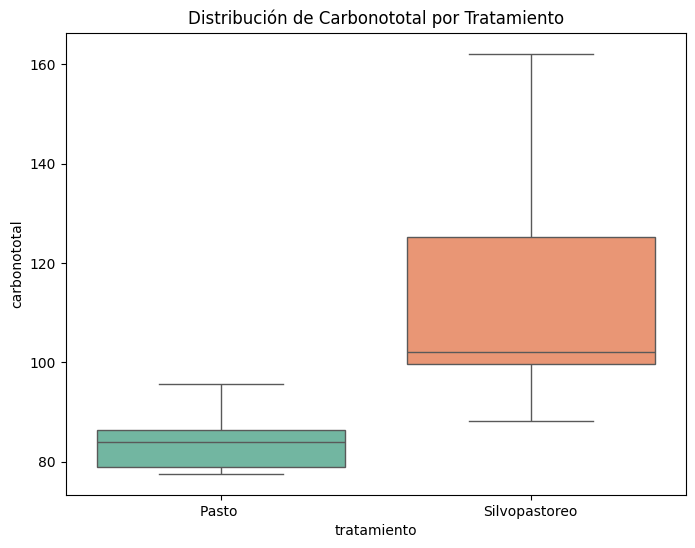

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='tratamiento', y='carbonototal', data=data, palette='Set2')
plt.title('Distribución de Carbonototal por Tratamiento')
plt.show()

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

# Paso 2: Ajustar el modelo
modelo = ols('carbonototal~ tratamiento + bloque', data=data).fit()

# Paso 3: Calcular residuos y Durbin-Watson
residuos = modelo.resid
dw = durbin_watson(residuos)
print(f"Estadístico de Durbin-Watson: {dw}")

# Paso 4: Gráfico de residuos vs. predicciones
plt.figure(figsize=(8, 6))
plt.scatter(modelo.fittedvalues, residuos, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Predicciones")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.grid()
plt.show()

# Paso 5: Correlograma (ACF) de los residuos
plt.figure(figsize=(8, 6))
plot_acf(residuos, lags=5)  # Changed lags to 5 (less than 50% of sample size)
plt.title("Correlograma (ACF) de los Residuos")
plt.show()

# Paso 6: Correlograma Parcial (PACF) de los residuos
plt.figure(figsize=(8, 6))
plot_pacf(residuos, lags=5)  # Changed lags to 5 (less than 50% of sample size)
plt.title("Correlograma Parcial (PACF) de los Residuos")
plt.show()

In [ ]:
# Paso 1: Importar la biblioteca necesaria
from statsmodels.stats.stattools import durbin_watson

# Paso 2: Ajustar el modelo
modelo = ols('carbonototal ~ tratamiento + bloque', data=data).fit()

# Paso 3: Calcular Durbin-Watson
dw = durbin_watson(modelo.resid)
print(f"Estadístico de Durbin-Watson: {dw}")

# Interpretación del valor
if 1.5 < dw < 2.5:
    print("No hay autocorrelación significativa (independencia aceptable).")
else:
    print("Posible autocorrelación en los residuos (revisar independencia).")


Estadístico de Durbin-Watson: 2.4316049867317595
No hay autocorrelación significativa (independencia aceptable).


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1     group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Pasto  Silvopastoreo  30.0833 0.0268 4.239 55.9277   True
---------------------------------------------------------

Agrupaciones por letras (a/b):
{'Pasto ': 'a', 'Silvopastoreo': 'b'}


<ipython-input-22-45520e21517a>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data.groupby('tratamiento')['carbonototal'].mean()


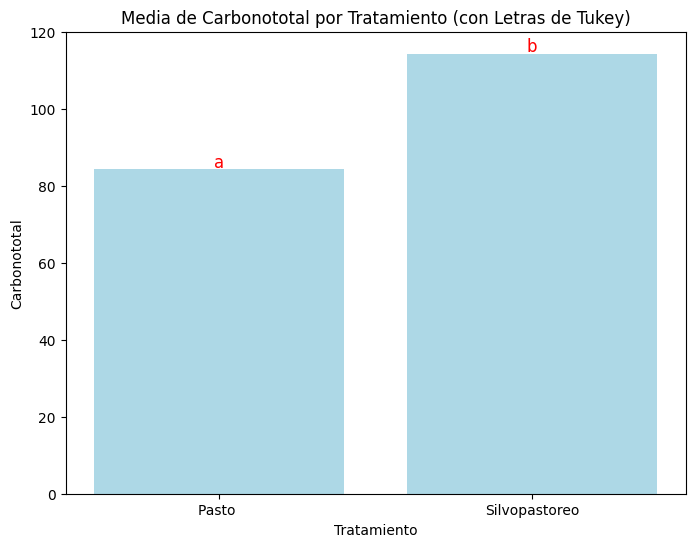

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Paso 2: Ajustar el modelo ANOVA
modelo = ols('carbonototal ~ tratamiento', data=data).fit()

# Paso 3: Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(data['carbonototal'], data['tratamiento'], alpha=0.05)
print(tukey)

# Paso 4: Crear agrupaciones por letras basadas en las diferencias significativas
# Convertimos los resultados de Tukey en un DataFrame
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Crear un diccionario para asignar las letras
def assign_letters(tukey_df):
    groups = {}
    for i, row in tukey_df.iterrows():
        group1, group2, reject = row['group1'], row['group2'], row['reject']
        if not reject:  # Si no hay diferencias significativas, asignamos el mismo grupo
            if group1 in groups:
                groups[group2] = groups[group1]
            elif group2 in groups:
                groups[group1] = groups[group2]
            else:
                groups[group1] = 'a'
                groups[group2] = 'a'
        else:  # Si hay diferencias significativas, asignamos diferentes grupos
            if group1 not in groups:
                groups[group1] = 'a'
            if group2 not in groups:
                groups[group2] = 'b'
    return groups

# Asignar letras
group_letters = assign_letters(tukey_df)
print("\nAgrupaciones por letras (a/b):")
print(group_letters)

# Paso 5: Visualización con letras en un gráfico
plt.figure(figsize=(8, 6))
mean_values = data.groupby('tratamiento')['carbonototal'].mean()
plt.bar(mean_values.index, mean_values.values, color='lightblue')
for i, (tratamiento, mean) in enumerate(mean_values.items()):
    plt.text(i, mean + 0.5, group_letters[tratamiento], ha='center', fontsize=12, color='red')
plt.title('Media de Carbonototal por Tratamiento (con Letras de Tukey)')
plt.xlabel('Tratamiento')
plt.ylabel('Carbonototal')
plt.show()


Saving Carbono Suelo profundidad.xlsx to Carbono Suelo profundidad.xlsx

Tabla ANOVA:
                   sum_sq    df          F        PR(>F)
Tratamiento     76.271111   1.0   0.803150  3.780745e-01
Profundidad  14667.120000   2.0  77.223803  6.765020e-12
Bloque         433.483333   5.0   0.912933  4.874254e-01
Residual      2564.055556  27.0        NaN           NaN

Prueba de Tukey para Profundidad:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  0-20  20-40    -37.8    0.0 -47.4682 -28.1318   True
  0-20  40-60    -46.5    0.0 -56.1682 -36.8318   True
 20-40  40-60     -8.7 0.0846 -18.3682   0.9682  False
------------------------------------------------------


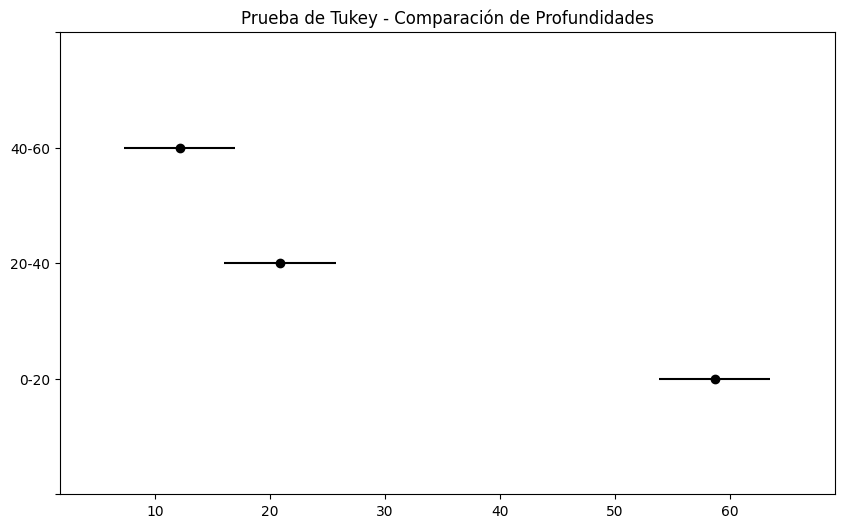

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo desde tu computadora
uploaded = files.upload()  # Esto te permitirá subir el archivo desde tu equipo

# Paso 3: Leer el archivo Excel cargado
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Paso 4: Limpiar los nombres de las columnas
data.columns = data.columns.str.strip()

# Paso 5: Convertir las columnas relevantes a categóricas
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Paso 6: Realizar ANOVA
modelo = ols('Q("COS") ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Paso 7: Realizar prueba de Tukey para Profundidad
print("\nPrueba de Tukey para Profundidad:")
tukey = pairwise_tukeyhsd(data['COS'], data['Profundidad'], alpha=0.05)
print(tukey)

# Visualizar resultados de Tukey
tukey.plot_simultaneous()
plt.title("Prueba de Tukey - Comparación de Profundidades")
plt.show()

Saving Carbono Suelo profundidad.xlsx to Carbono Suelo profundidad (1).xlsx

Tabla ANOVA:
                   sum_sq    df          F        PR(>F)
Tratamiento     76.271111   1.0   0.803150  3.780745e-01
Profundidad  14667.120000   2.0  77.223803  6.765020e-12
Bloque         433.483333   5.0   0.912933  4.874254e-01
Residual      2564.055556  27.0        NaN           NaN

Prueba de Tukey para Profundidad:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  0-20  20-40    -37.8    0.0 -47.4682 -28.1318   True
  0-20  40-60    -46.5    0.0 -56.1682 -36.8318   True
 20-40  40-60     -8.7 0.0846 -18.3682   0.9682  False
------------------------------------------------------

Letras de agrupación basadas en Tukey (Profundidad):
{'0-20': 'a', '20-40': 'b', '40-60': 'b'}


<ipython-input-29-6efdec8c0ac0>:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data.groupby('Profundidad')['COS'].mean()


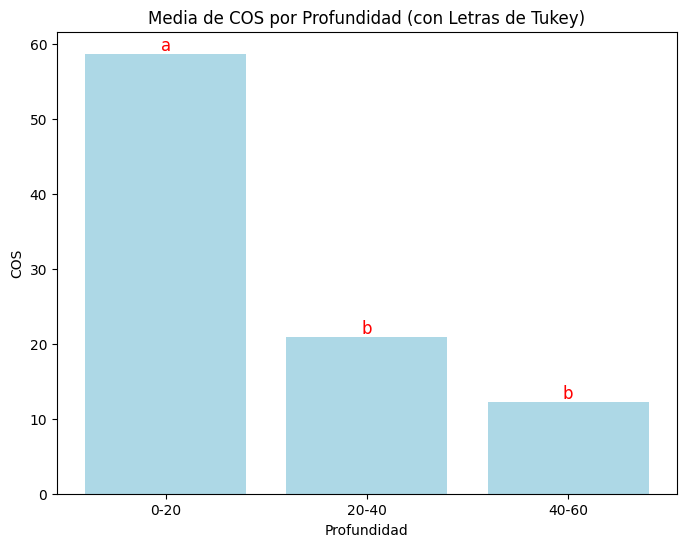

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Nombre del archivo
data = pd.read_excel(file_name)

# Paso 3: Limpiar y procesar los datos
data.columns = data.columns.str.strip()
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Paso 4: Realizar ANOVA
modelo = ols('COS ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Paso 5: Realizar prueba de Tukey
print("\nPrueba de Tukey para Profundidad:")
tukey = pairwise_tukeyhsd(data['COS'], data['Profundidad'], alpha=0.05)
print(tukey)

# Paso 6: Convertir resultados de Tukey a DataFrame
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Paso 7: Asignar letras de diferencia
def assign_letters(tukey_df):
    groups = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'  # Letras para asignar
    letter_index = 0

    # Asignar letras basadas en la significancia
    for i, row in tukey_df.iterrows():
        group1, group2, reject = row['group1'], row['group2'], row['reject']
        if not reject:  # Si no hay diferencia significativa
            if group1 in groups:
                groups[group2] = groups[group1]
            elif group2 in groups:
                groups[group1] = groups[group2]
            else:
                groups[group1] = letters[letter_index]
                groups[group2] = letters[letter_index]
        else:  # Si hay diferencia significativa
            if group1 not in groups:
                groups[group1] = letters[letter_index]
                letter_index += 1
            if group2 not in groups:
                groups[group2] = letters[letter_index]
                letter_index += 1
    return groups

# Asignar letras a las profundidades
group_letters = assign_letters(tukey_df)
print("\nLetras de agrupación basadas en Tukey (Profundidad):")
print(group_letters)

# Paso 8: Visualización con letras
plt.figure(figsize=(8, 6))
mean_values = data.groupby('Profundidad')['COS'].mean()
plt.bar(mean_values.index, mean_values.values, color='lightblue')
for i, (profundidad, mean) in enumerate(mean_values.items()):
    plt.text(i, mean + 0.5, group_letters[profundidad], ha='center', fontsize=12, color='red')
plt.title('Media de COS por Profundidad (con Letras de Tukey)')
plt.xlabel('Profundidad')
plt.ylabel('COS')
plt.show()

Saving Carbono Suelo profundidad.xlsx to Carbono Suelo profundidad (6).xlsx

Tabla ANOVA:
                   sum_sq    df          F        PR(>F)
Tratamiento     76.271111   1.0   0.803150  3.780745e-01
Profundidad  14667.120000   2.0  77.223803  6.765020e-12
Bloque         433.483333   5.0   0.912933  4.874254e-01
Residual      2564.055556  27.0        NaN           NaN

Prueba de Tukey para Tratamiento:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1     group2    meandiff p-adj  lower    upper  reject
-----------------------------------------------------------
Pasto  Silvopastoreo   2.9111 0.704 -12.5296 18.3518  False
-----------------------------------------------------------

Prueba de Tukey para Profundidad:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  0-20  20-40    -37.8    0.0 -47.4682 -28.1318   True
  0-20  40-60    -46.5    0.0 -56.1

<ipython-input-34-6aba5d9df11c>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tratamiento = data.groupby('Tratamiento')['COS'].mean()


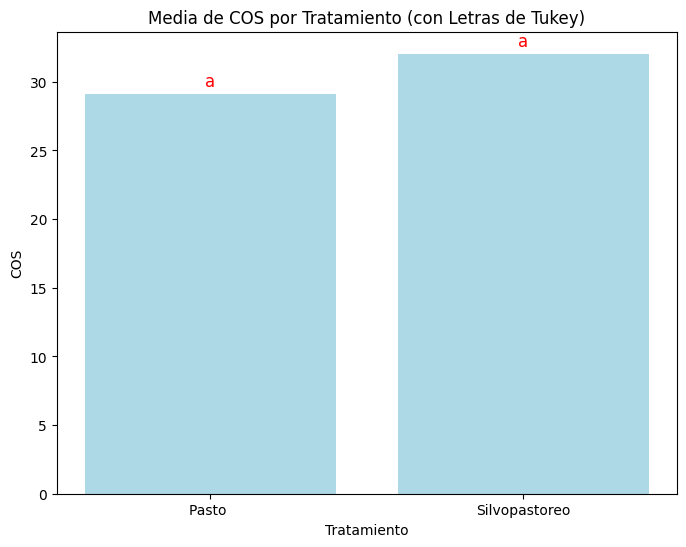

<ipython-input-34-6aba5d9df11c>:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profundidad = data.groupby('Profundidad')['COS'].mean()


Text(0, 0.5, 'COS')

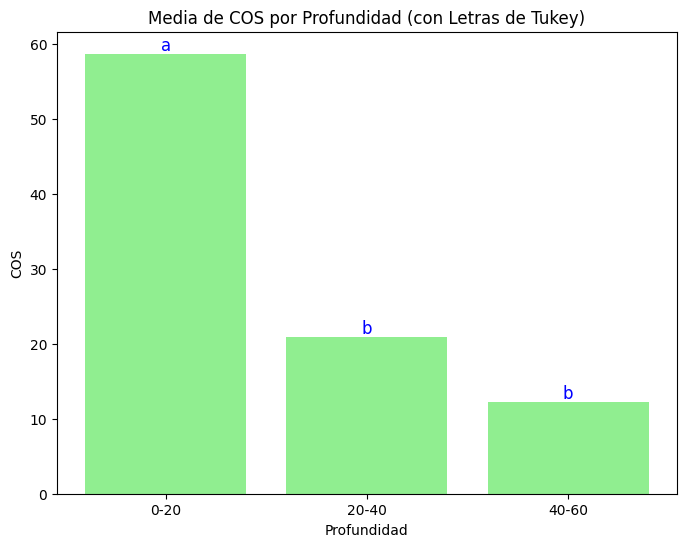

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Cargar archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Convertir columnas relevantes a categóricas
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Realizar ANOVA
modelo = ols('COS ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Prueba de Tukey para Tratamiento
print("\nPrueba de Tukey para Tratamiento:")
tukey_tratamiento = pairwise_tukeyhsd(data['COS'], data['Tratamiento'], alpha=0.05)
print(tukey_tratamiento)

# Prueba de Tukey para Profundidad
print("\nPrueba de Tukey para Profundidad:")
tukey_profundidad = pairwise_tukeyhsd(data['COS'], data['Profundidad'], alpha=0.05)
print(tukey_profundidad)

# Función para asignar letras de diferencia
def assign_letters(tukey_result):
    groups = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'
    letter_index = 0

    for row in tukey_result.summary().data[1:]:
        group1, group2, reject = row[0], row[1], row[6]
        if not reject:  # Si no hay diferencias significativas
            if group1 in groups:
                groups[group2] = groups[group1]
            elif group2 in groups:
                groups[group1] = groups[group2]
            else:
                groups[group1] = letters[letter_index]
                groups[group2] = letters[letter_index]
        else:  # Si hay diferencias significativas
            if group1 not in groups:
                groups[group1] = letters[letter_index]
                letter_index += 1
            if group2 not in groups:
                groups[group2] = letters[letter_index]
                letter_index += 1
    return groups

# Asignar letras
letras_tratamiento = assign_letters(tukey_tratamiento)
letras_profundidad = assign_letters(tukey_profundidad)

print("\nLetras de agrupación para Tratamiento:")
print(letras_tratamiento)
print("\nLetras de agrupación para Profundidad:")
print(letras_profundidad)

# Gráfico para Tratamiento
plt.figure(figsize=(8, 6))
mean_tratamiento = data.groupby('Tratamiento')['COS'].mean()
plt.bar(mean_tratamiento.index, mean_tratamiento.values, color='lightblue')
for i, (tratamiento, mean) in enumerate(mean_tratamiento.items()):
    plt.text(i, mean + 0.5, letras_tratamiento[tratamiento], ha='center', fontsize=12, color='red')
plt.title('Media de COS por Tratamiento (con Letras de Tukey)')
plt.xlabel('Tratamiento')
plt.ylabel('COS')
plt.show()

# Gráfico para Profundidad
plt.figure(figsize=(8, 6))
mean_profundidad = data.groupby('Profundidad')['COS'].mean()
plt.bar(mean_profundidad.index, mean_profundidad.values, color='lightgreen')
for i, (profundidad, mean) in enumerate(mean_profundidad.items()):
    plt.text(i, mean + 0.5, letras_profundidad[profundidad], ha='center', fontsize=12, color='blue')
plt.title('Media de COS por Profundidad (con Letras de Tukey)')
plt.xlabel('Profundidad')
plt.ylabel('COS')

Saving Carbono Suelo profundidad.xlsx to Carbono Suelo profundidad (7).xlsx
Prueba de Shapiro-Wilk:
Estadístico: 0.8690, p-valor: 0.0005
Se rechaza H0: Los datos no tienen distribución normal.

Prueba de D'Agostino y Pearson:
Estadístico: 6.0485, p-valor: 0.0486
Se rechaza H0: Los datos no tienen distribución normal.

Prueba de Anderson-Darling:
Estadístico: 1.9016
A nivel de significancia 15.0%, se rechaza H0 (No Normalidad).
A nivel de significancia 10.0%, se rechaza H0 (No Normalidad).
A nivel de significancia 5.0%, se rechaza H0 (No Normalidad).
A nivel de significancia 2.5%, se rechaza H0 (No Normalidad).
A nivel de significancia 1.0%, se rechaza H0 (No Normalidad).


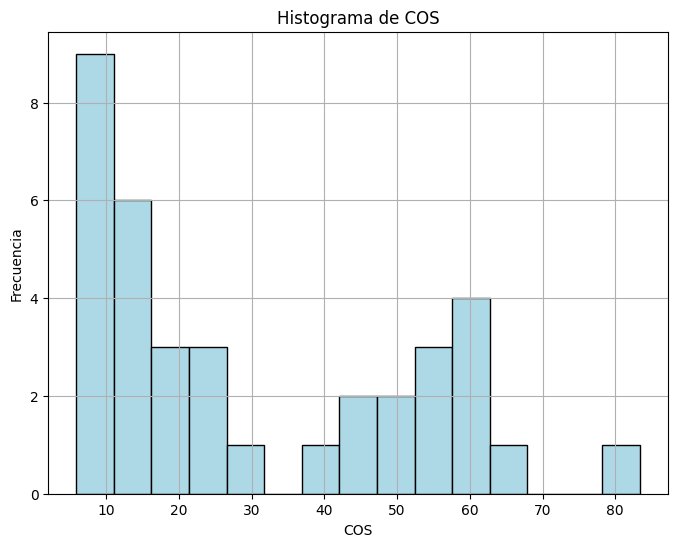

<Figure size 800x600 with 0 Axes>

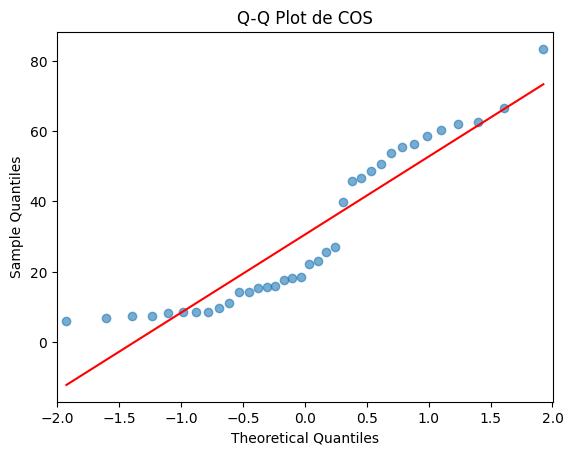

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson
from statsmodels.graphics.gofplots import qqplot
from google.colab import files

# Paso 2: Cargar el archivo desde tu computadora
uploaded = files.upload()  # Te permitirá subir el archivo desde tu equipo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Paso 3: Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Paso 4: Extraer la columna 'COS' para análisis de normalidad
cos_data = data['COS']

# Paso 5: Prueba de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(cos_data)
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {stat_shapiro:.4f}, p-valor: {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("No se rechaza H0: Los datos tienen distribución normal.")
else:
    print("Se rechaza H0: Los datos no tienen distribución normal.")

# Paso 6: Prueba de D’Agostino y Pearson
stat_dagostino, p_dagostino = normaltest(cos_data)
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {stat_dagostino:.4f}, p-valor: {p_dagostino:.4f}")
if p_dagostino > 0.05:
    print("No se rechaza H0: Los datos tienen distribución normal.")
else:
    print("Se rechaza H0: Los datos no tienen distribución normal.")

# Paso 7: Prueba de Anderson-Darling
print("\nPrueba de Anderson-Darling:")
anderson_result = anderson(cos_data)
print(f"Estadístico: {anderson_result.statistic:.4f}")
for i, (sl, cv) in enumerate(zip(anderson_result.significance_level, anderson_result.critical_values)):
    if anderson_result.statistic < cv:
        print(f"A nivel de significancia {sl}%, no se rechaza H0 (Normalidad).")
    else:
        print(f"A nivel de significancia {sl}%, se rechaza H0 (No Normalidad).")

# Paso 8: Visualización gráfica
# Histograma
plt.figure(figsize=(8, 6))
plt.hist(cos_data, bins=15, edgecolor='black', color='lightblue')
plt.title('Histograma de COS')
plt.xlabel('COS')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
qqplot(cos_data, line='s', alpha=0.6)
plt.title('Q-Q Plot de COS')
plt.show()

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import levene, bartlett
from google.colab import files

# Cargar el archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Asegurarnos de que las columnas categóricas estén en el formato correcto
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Pruebas de Homocedasticidad

# Separar los grupos de COS por niveles de Tratamiento
tratamiento_grupos = [data[data['Tratamiento'] == grupo]['COS'] for grupo in data['Tratamiento'].unique()]

# Prueba de Levene para Tratamiento
stat_levene, p_levene = levene(*tratamiento_grupos)
print("Prueba de Levene para Tratamiento:")
print(f"Estadístico: {stat_levene:.4f}, p-valor: {p_levene:.4f}")
if p_levene > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")

# Separar los grupos de COS por niveles de Profundidad
profundidad_grupos = [data[data['Profundidad'] == grupo]['COS'] for grupo in data['Profundidad'].unique()]

# Prueba de Levene para Profundidad
stat_levene_prof, p_levene_prof = levene(*profundidad_grupos)
print("\nPrueba de Levene para Profundidad:")
print(f"Estadístico: {stat_levene_prof:.4f}, p-valor: {p_levene_prof:.4f}")
if p_levene_prof > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")

# Prueba de Bartlett para Tratamiento
stat_bartlett, p_bartlett = bartlett(*tratamiento_grupos)
print("\nPrueba de Bartlett para Tratamiento:")
print(f"Estadístico: {stat_bartlett:.4f}, p-valor: {p_bartlett:.4f}")
if p_bartlett > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")

# Prueba de Bartlett para Profundidad
stat_bartlett_prof, p_bartlett_prof = bartlett(*profundidad_grupos)
print("\nPrueba de Bartlett para Profundidad:")
print(f"Estadístico: {stat_bartlett_prof:.4f}, p-valor: {p_bartlett_prof:.4f}")
if p_bartlett_prof > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")


Saving Carbono Suelo profundidad.xlsx to Carbono Suelo profundidad (8).xlsx
Prueba de Levene para Tratamiento:
Estadístico: 0.0694, p-valor: 0.7937
No se rechaza H0: Las varianzas son homogéneas.

Prueba de Levene para Profundidad:
Estadístico: 0.2409, p-valor: 0.7873
No se rechaza H0: Las varianzas son homogéneas.

Prueba de Bartlett para Tratamiento:
Estadístico: 0.0008, p-valor: 0.9772
No se rechaza H0: Las varianzas son homogéneas.

Prueba de Bartlett para Profundidad:
Estadístico: 1.5935, p-valor: 0.4508
No se rechaza H0: Las varianzas son homogéneas.


In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, normaltest, anderson

# Paso 2: Calcular los residuos del modelo ANOVA
modelo = ols('COS ~ Tratamiento + Bloque', data=data).fit()
residuos = modelo.resid

# Paso 3: Prueba de Shapiro-Wilk
stat, p = shapiro(residuos)
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {stat}, p-valor: {p}")
if p > 0.05:
    print("Los residuos tienen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no tienen una distribución normal (se rechaza H0).")

# Paso 4: Prueba de D’Agostino y Pearson
stat, p = normaltest(residuos)
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {stat}, p-valor: {p}")
if p > 0.05:
    print("Los residuos tienen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no tienen una distribución normal (se rechaza H0).")

# Paso 5: Prueba de Anderson-Darling
print("\nPrueba de Anderson-Darling:")
result = anderson(residuos)
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    sig_level, critical = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical:
        print(f"A nivel de significancia {sig_level}%, no se rechaza H0 (normalidad).")
    else:
        print(f"A nivel de significancia {sig_level}%, se rechaza H0 (no normalidad).")


Prueba de Shapiro-Wilk:
Estadístico: 0.8915601176292576, p-valor: 0.0020218824077279977
Los residuos no tienen una distribución normal (se rechaza H0).

Prueba de D'Agostino y Pearson:
Estadístico: 5.7674944703354525, p-valor: 0.05592480630064275
Los residuos tienen una distribución normal (no se rechaza H0).

Prueba de Anderson-Darling:
Estadístico: 1.6072906560762164
A nivel de significancia 15.0%, se rechaza H0 (no normalidad).
A nivel de significancia 10.0%, se rechaza H0 (no normalidad).
A nivel de significancia 5.0%, se rechaza H0 (no normalidad).
A nivel de significancia 2.5%, se rechaza H0 (no normalidad).
A nivel de significancia 1.0%, se rechaza H0 (no normalidad).


In [ ]:
# Paso 1: Importar la biblioteca necesaria
from statsmodels.stats.stattools import durbin_watson

# Paso 2: Ajustar el modelo
modelo = ols('COS ~ Tratamiento + Bloque', data=data).fit()

# Paso 3: Calcular Durbin-Watson
dw = durbin_watson(modelo.resid)
print(f"Estadístico de Durbin-Watson: {dw}")

# Interpretación del valor
if 1.5 < dw < 2.5:
    print("No hay autocorrelación significativa (independencia aceptable).")
else:
    print("Posible autocorrelación en los residuos (revisar independencia).")


Estadístico de Durbin-Watson: 2.7241803941896245
Posible autocorrelación en los residuos (revisar independencia).


In [ ]:
# Paso 1: Importar la biblioteca necesaria
from scipy.stats import levene, bartlett

# Paso 2: Separar los grupos según el tratamiento
grupos = [data[data['Tratamiento'] == grupo]['COS'] for grupo in data['Tratamiento'].unique()]

# Paso 3: Prueba de Levene
stat_levene, p_levene = levene(*grupos)
print("Prueba de Levene:")
print(f"Estadístico: {stat_levene}, p-valor: {p_levene}")
if p_levene > 0.05:
    print("Las varianzas son homogéneas (no se rechaza H0).")
else:
    print("Las varianzas no son homogéneas (se rechaza H0).")

# Paso 4: Prueba de Bartlett
stat_bartlett, p_bartlett = bartlett(*grupos)
print("\nPrueba de Bartlett:")
print(f"Estadístico: {stat_bartlett}, p-valor: {p_bartlett}")
if p_bartlett > 0.05:
    print("Las varianzas son homogéneas (no se rechaza H0).")
else:
    print("Las varianzas no son homogéneas (se rechaza H0).")


Prueba de Levene:
Estadístico: 0.06943963962539952, p-valor: 0.7937449479136014
Las varianzas son homogéneas (no se rechaza H0).

Prueba de Bartlett:
Estadístico: 0.0008139481636768714, p-valor: 0.9772396192464822
Las varianzas son homogéneas (no se rechaza H0).


Saving Carbono raices por profundidad.xlsx to Carbono raices por profundidad.xlsx

Tabla ANOVA:
                sum_sq    df          F    PR(>F)
Tratamiento   7.798987   1.0  17.324337  0.000288
Profundidad  16.256026   2.0  18.055222  0.000011
Bloque        0.440725   5.0   0.195802  0.961441
Residual     12.154730  27.0        NaN       NaN

Prueba de Tukey para Profundidad:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0-20  20-40  -1.4056 0.0003 -2.1931 -0.6181   True
  0-20  40-60  -1.4446 0.0002 -2.2321 -0.6571   True
 20-40  40-60   -0.039 0.9919 -0.8265  0.7485  False
----------------------------------------------------


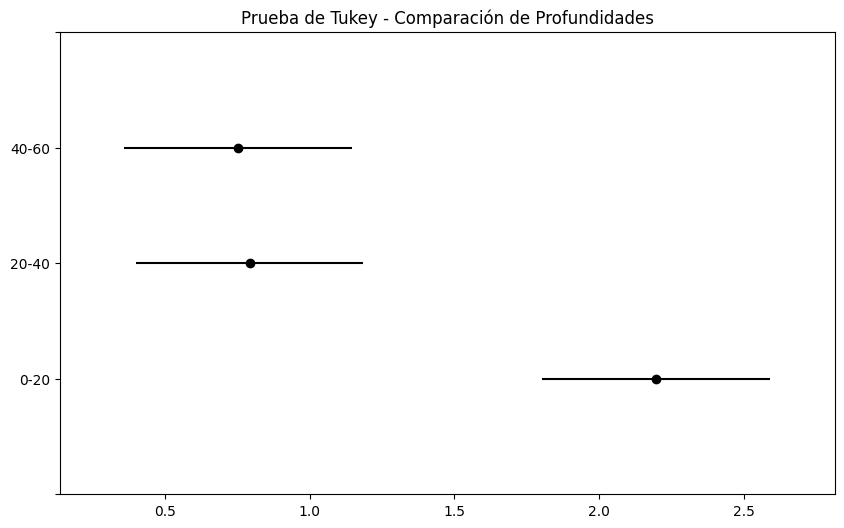

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo desde tu computadora
uploaded = files.upload()  # Esto te permitirá subir el archivo desde tu equipo

# Paso 3: Leer el archivo Excel cargado
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Paso 4: Limpiar los nombres de las columnas
data.columns = data.columns.str.strip()

# Paso 5: Convertir las columnas relevantes a categóricas
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Paso 6: Realizar ANOVA
modelo = ols('Q("raices") ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Paso 7: Realizar prueba de Tukey para Profundidad
print("\nPrueba de Tukey para Profundidad:")
tukey = pairwise_tukeyhsd(data['raices'], data['Profundidad'], alpha=0.05)
print(tukey)

# Visualizar resultados de Tukey
tukey.plot_simultaneous()
plt.title("Prueba de Tukey - Comparación de Profundidades")
plt.show()

Saving Carbono raices por profundidad.xlsx to Carbono raices por profundidad (1).xlsx

Tabla ANOVA:
                sum_sq    df          F    PR(>F)
Tratamiento   7.798987   1.0  17.324337  0.000288
Profundidad  16.256026   2.0  18.055222  0.000011
Bloque        0.440725   5.0   0.195802  0.961441
Residual     12.154730  27.0        NaN       NaN

Prueba de Tukey para Tratamiento:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1     group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Pasto  Silvopastoreo   0.9309 0.0046 0.3069 1.5549   True
---------------------------------------------------------

Prueba de Tukey para Profundidad:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0-20  20-40  -1.4056 0.0003 -2.1931 -0.6181   True
  0-20  40-60  -1.4446 0.0002 -2.2321 -0.6571   True
 20-40  40-60   -0.039 0.

<ipython-input-43-0b65db54567c>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tratamiento = data.groupby('Tratamiento')['raices'].mean()


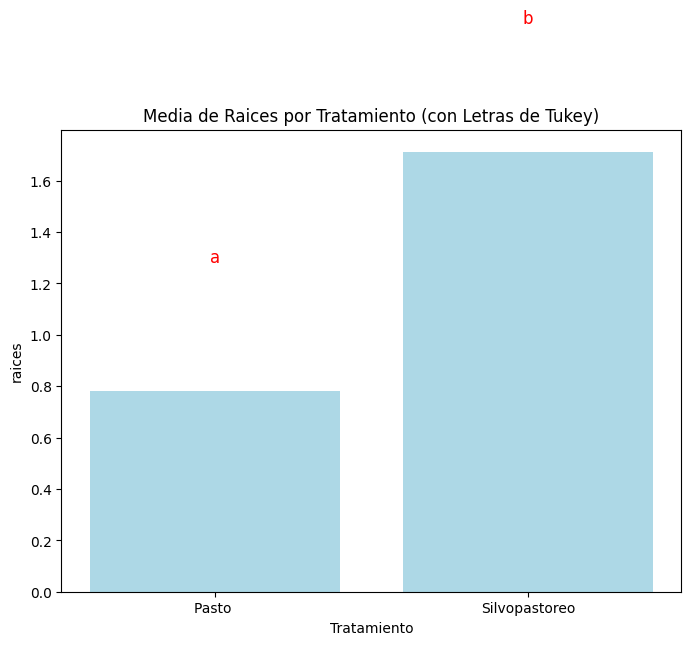

<ipython-input-43-0b65db54567c>:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profundidad = data.groupby('Profundidad')['raices'].mean()


Text(0, 0.5, 'raices')

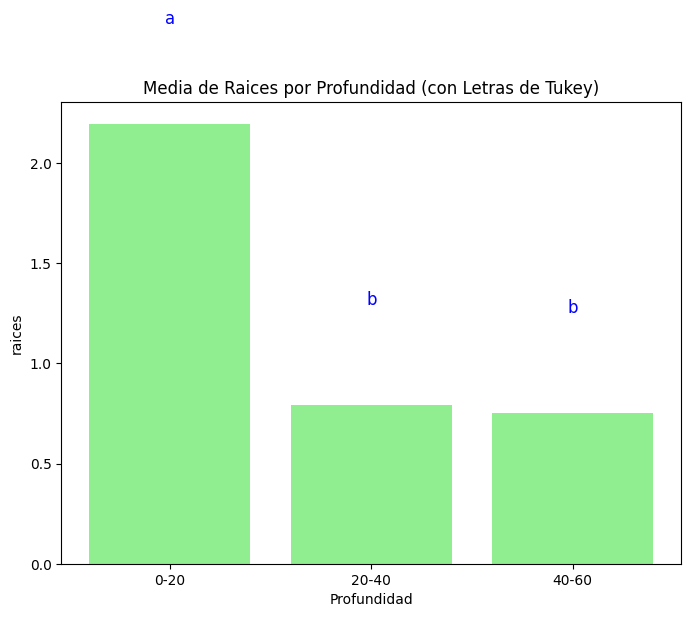

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Cargar archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Convertir columnas relevantes a categóricas
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Realizar ANOVA
modelo = ols('raices ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Prueba de Tukey para Tratamiento
print("\nPrueba de Tukey para Tratamiento:")
tukey_tratamiento = pairwise_tukeyhsd(data['raices'], data['Tratamiento'], alpha=0.05)
print(tukey_tratamiento)

# Prueba de Tukey para Profundidad
print("\nPrueba de Tukey para Profundidad:")
tukey_profundidad = pairwise_tukeyhsd(data['raices'], data['Profundidad'], alpha=0.05)
print(tukey_profundidad)

# Función para asignar letras de diferencia
def assign_letters(tukey_result):
    groups = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'
    letter_index = 0

    for row in tukey_result.summary().data[1:]:
        group1, group2, reject = row[0], row[1], row[6]
        if not reject:  # Si no hay diferencias significativas
            if group1 in groups:
                groups[group2] = groups[group1]
            elif group2 in groups:
                groups[group1] = groups[group2]
            else:
                groups[group1] = letters[letter_index]
                groups[group2] = letters[letter_index]
        else:  # Si hay diferencias significativas
            if group1 not in groups:
                groups[group1] = letters[letter_index]
                letter_index += 1
            if group2 not in groups:
                groups[group2] = letters[letter_index]
                letter_index += 1
    return groups

# Asignar letras
letras_tratamiento = assign_letters(tukey_tratamiento)
letras_profundidad = assign_letters(tukey_profundidad)

print("\nLetras de agrupación para Tratamiento:")
print(letras_tratamiento)
print("\nLetras de agrupación para Profundidad:")
print(letras_profundidad)

# Gráfico para Tratamiento
plt.figure(figsize=(8, 6))
mean_tratamiento = data.groupby('Tratamiento')['raices'].mean()
plt.bar(mean_tratamiento.index, mean_tratamiento.values, color='lightblue')
for i, (tratamiento, mean) in enumerate(mean_tratamiento.items()):
    plt.text(i, mean + 0.5, letras_tratamiento[tratamiento], ha='center', fontsize=12, color='red')
plt.title('Media de Raices por Tratamiento (con Letras de Tukey)')
plt.xlabel('Tratamiento')
plt.ylabel('raices')
plt.show()

# Gráfico para Profundidad
plt.figure(figsize=(8, 6))
mean_profundidad = data.groupby('Profundidad')['raices'].mean()
plt.bar(mean_profundidad.index, mean_profundidad.values, color='lightgreen')
for i, (profundidad, mean) in enumerate(mean_profundidad.items()):
    plt.text(i, mean + 0.5, letras_profundidad[profundidad], ha='center', fontsize=12, color='blue')
plt.title('Media de Raices por Profundidad (con Letras de Tukey)')
plt.xlabel('Profundidad')
plt.ylabel('raices')

A fin de ejecutar el código en la celda anterior, haz clic en él para seleccionarlo y luego presiona el botón de reproducción ubicado a la izquierda del código o usa la combinación de teclas "Command/Ctrl + Intro". Para editar el código, solo haz clic en la celda y comienza a editar.

Las variables que defines en una celda pueden usarse en otras:

Saving Carbono raices por profundidad.xlsx to Carbono raices por profundidad (3).xlsx

Tabla ANOVA:
                sum_sq    df          F    PR(>F)
Tratamiento   7.798987   1.0  17.324337  0.000288
Profundidad  16.256026   2.0  18.055222  0.000011
Bloque        0.440725   5.0   0.195802  0.961441
Residual     12.154730  27.0        NaN       NaN

Prueba de Tukey para Tratamiento:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1     group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Pasto  Silvopastoreo   0.9309 0.0046 0.3069 1.5549   True
---------------------------------------------------------

Prueba de Tukey para Profundidad:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0-20  20-40  -1.4056 0.0003 -2.1931 -0.6181   True
  0-20  40-60  -1.4446 0.0002 -2.2321 -0.6571   True
 20-40  40-60   -0.039 0.

<ipython-input-45-2549b02dc453>:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tratamiento = data.groupby('Tratamiento')['raices'].mean()


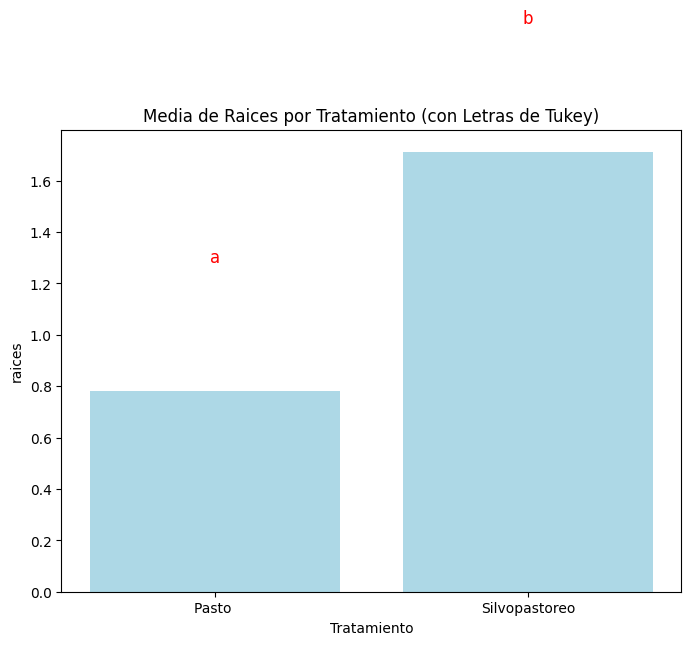

El análisis para Tratamiento muestra las siguientes diferencias:
- Nivel 'Pasto ' tiene una media de 0.78 y pertenece al grupo 'a'.
- Nivel 'Silvopastoreo' tiene una media de 1.71 y pertenece al grupo 'b'.

En total, hay 2 grupos diferentes: b, a.



<ipython-input-45-2549b02dc453>:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profundidad = data.groupby('Profundidad')['raices'].mean()


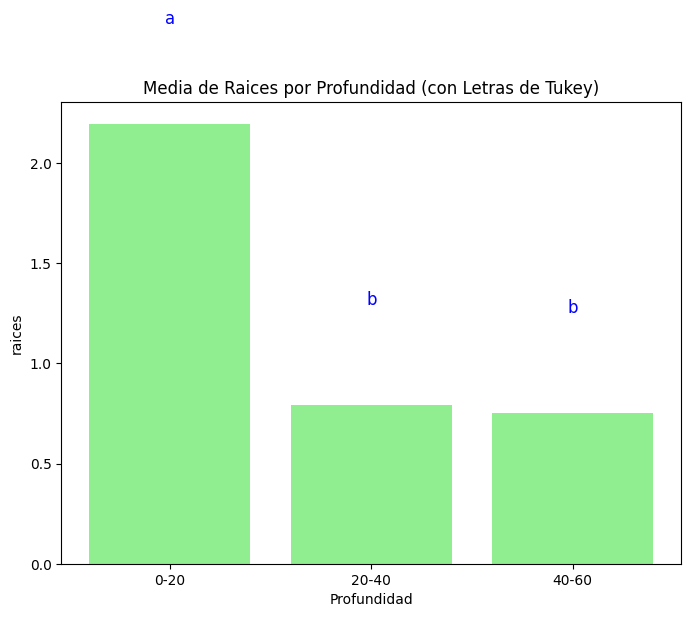

El análisis para Profundidad muestra las siguientes diferencias:
- Nivel '0-20' tiene una media de 2.20 y pertenece al grupo 'a'.
- Nivel '20-40' tiene una media de 0.79 y pertenece al grupo 'b'.
- Nivel '40-60' tiene una media de 0.75 y pertenece al grupo 'b'.

En total, hay 2 grupos diferentes: b, a.



In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Cargar archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Convertir columnas relevantes a categóricas
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Realizar ANOVA
modelo = ols('raices ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Prueba de Tukey para Tratamiento
print("\nPrueba de Tukey para Tratamiento:")
tukey_tratamiento = pairwise_tukeyhsd(data['raices'], data['Tratamiento'], alpha=0.05)
print(tukey_tratamiento)

# Prueba de Tukey para Profundidad
print("\nPrueba de Tukey para Profundidad:")
tukey_profundidad = pairwise_tukeyhsd(data['raices'], data['Profundidad'], alpha=0.05)
print(tukey_profundidad)

# Función para asignar letras de diferencia
def assign_letters(tukey_result):
    groups = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'
    letter_index = 0

    for row in tukey_result.summary().data[1:]:
        group1, group2, reject = row[0], row[1], row[6]
        if not reject:  # Si no hay diferencias significativas
            if group1 in groups:
                groups[group2] = groups[group1]
            elif group2 in groups:
                groups[group1] = groups[group2]
            else:
                groups[group1] = letters[letter_index]
                groups[group2] = letters[letter_index]
        else:  # Si hay diferencias significativas
            if group1 not in groups:
                groups[group1] = letters[letter_index]
                letter_index += 1
            if group2 not in groups:
                groups[group2] = letters[letter_index]
                letter_index += 1
    return groups

# Asignar letras
letras_tratamiento = assign_letters(tukey_tratamiento)
letras_profundidad = assign_letters(tukey_profundidad)

# Función para generar explicaciones automáticas
def explain_results(mean_values, letters, factor_name):
    explanation = f"El análisis para {factor_name} muestra las siguientes diferencias:\n"
    for level, mean in mean_values.items():
        explanation += f"- Nivel '{level}' tiene una media de {mean:.2f} y pertenece al grupo '{letters[level]}'.\n"
    unique_letters = set(letters.values())
    explanation += f"\nEn total, hay {len(unique_letters)} grupos diferentes: {', '.join(unique_letters)}.\n"
    return explanation

# Gráfico y explicación para Tratamiento
plt.figure(figsize=(8, 6))
mean_tratamiento = data.groupby('Tratamiento')['raices'].mean()
plt.bar(mean_tratamiento.index, mean_tratamiento.values, color='lightblue')
for i, (tratamiento, mean) in enumerate(mean_tratamiento.items()):
    plt.text(i, mean + 0.5, letras_tratamiento[tratamiento], ha='center', fontsize=12, color='red')
plt.title('Media de Raices por Tratamiento (con Letras de Tukey)')
plt.xlabel('Tratamiento')
plt.ylabel('raices')
plt.show()

# Explicación automática para Tratamiento
tratamiento_explanation = explain_results(mean_tratamiento, letras_tratamiento, "Tratamiento")
print(tratamiento_explanation)

# Gráfico y explicación para Profundidad
plt.figure(figsize=(8, 6))
mean_profundidad = data.groupby('Profundidad')['raices'].mean()
plt.bar(mean_profundidad.index, mean_profundidad.values, color='lightgreen')
for i, (profundidad, mean) in enumerate(mean_profundidad.items()):
    plt.text(i, mean + 0.5, letras_profundidad[profundidad], ha='center', fontsize=12, color='blue')
plt.title('Media de Raices por Profundidad (con Letras de Tukey)')
plt.xlabel('Profundidad')
plt.ylabel('raices')
plt.show()

# Explicación automática para Profundidad
profundidad_explanation = explain_results(mean_profundidad, letras_profundidad, "Profundidad")
print(profundidad_explanation)


Saving Carbono raices por profundidad.xlsx to Carbono raices por profundidad (4).xlsx
Prueba de Shapiro-Wilk:
Estadístico: 0.9144, p-valor: 0.0086
Se rechaza H0: Los datos no tienen distribución normal.

Prueba de D'Agostino y Pearson:
Estadístico: 5.3179, p-valor: 0.0700
No se rechaza H0: Los datos tienen distribución normal.

Prueba de Anderson-Darling:
Estadístico: 0.8225
A nivel de significancia 15.0%, se rechaza H0 (No Normalidad).
A nivel de significancia 10.0%, se rechaza H0 (No Normalidad).
A nivel de significancia 5.0%, se rechaza H0 (No Normalidad).
A nivel de significancia 2.5%, no se rechaza H0 (Normalidad).
A nivel de significancia 1.0%, no se rechaza H0 (Normalidad).


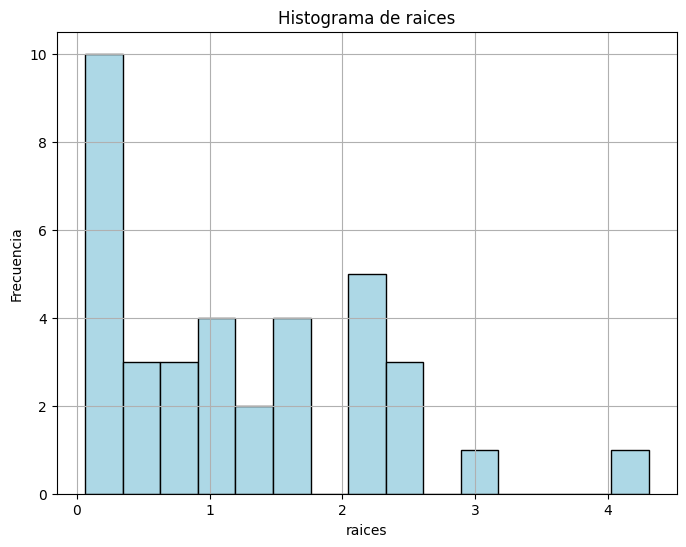

<Figure size 800x600 with 0 Axes>

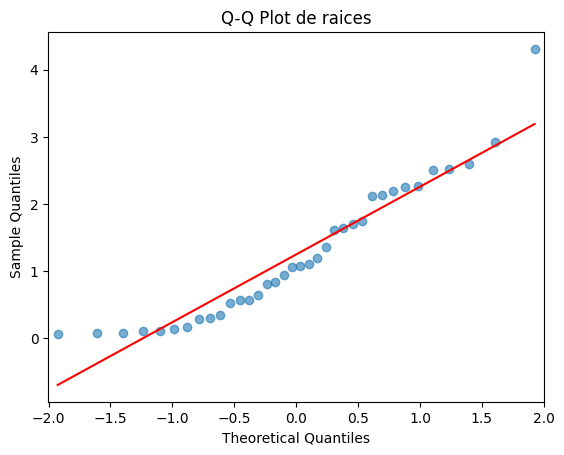

In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson
from statsmodels.graphics.gofplots import qqplot
from google.colab import files

# Paso 2: Cargar el archivo desde tu computadora
uploaded = files.upload()  # Te permitirá subir el archivo desde tu equipo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Paso 3: Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Paso 4: Extraer la columna 'COS' para análisis de normalidad
cos_data = data['raices']

# Paso 5: Prueba de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(cos_data)
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {stat_shapiro:.4f}, p-valor: {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("No se rechaza H0: Los datos tienen distribución normal.")
else:
    print("Se rechaza H0: Los datos no tienen distribución normal.")

# Paso 6: Prueba de D’Agostino y Pearson
stat_dagostino, p_dagostino = normaltest(cos_data)
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {stat_dagostino:.4f}, p-valor: {p_dagostino:.4f}")
if p_dagostino > 0.05:
    print("No se rechaza H0: Los datos tienen distribución normal.")
else:
    print("Se rechaza H0: Los datos no tienen distribución normal.")

# Paso 7: Prueba de Anderson-Darling
print("\nPrueba de Anderson-Darling:")
anderson_result = anderson(cos_data)
print(f"Estadístico: {anderson_result.statistic:.4f}")
for i, (sl, cv) in enumerate(zip(anderson_result.significance_level, anderson_result.critical_values)):
    if anderson_result.statistic < cv:
        print(f"A nivel de significancia {sl}%, no se rechaza H0 (Normalidad).")
    else:
        print(f"A nivel de significancia {sl}%, se rechaza H0 (No Normalidad).")

# Paso 8: Visualización gráfica
# Histograma
plt.figure(figsize=(8, 6))
plt.hist(cos_data, bins=15, edgecolor='black', color='lightblue')
plt.title('Histograma de raices')
plt.xlabel('raices')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
qqplot(cos_data, line='s', alpha=0.6)
plt.title('Q-Q Plot de raices')
plt.show()

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import levene, bartlett
from google.colab import files

# Cargar el archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Asegurarnos de que las columnas categóricas estén en el formato correcto
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Pruebas de Homocedasticidad

# Separar los grupos de COS por niveles de Tratamiento
tratamiento_grupos = [data[data['Tratamiento'] == grupo]['raices'] for grupo in data['Tratamiento'].unique()]

# Prueba de Levene para Tratamiento
stat_levene, p_levene = levene(*tratamiento_grupos)
print("Prueba de Levene para Tratamiento:")
print(f"Estadístico: {stat_levene:.4f}, p-valor: {p_levene:.4f}")
if p_levene > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")

# Separar los grupos de COS por niveles de Profundidad
profundidad_grupos = [data[data['Profundidad'] == grupo]['raices'] for grupo in data['Profundidad'].unique()]

# Prueba de Levene para Profundidad
stat_levene_prof, p_levene_prof = levene(*profundidad_grupos)
print("\nPrueba de Levene para Profundidad:")
print(f"Estadístico: {stat_levene_prof:.4f}, p-valor: {p_levene_prof:.4f}")
if p_levene_prof > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")

# Prueba de Bartlett para Tratamiento
stat_bartlett, p_bartlett = bartlett(*tratamiento_grupos)
print("\nPrueba de Bartlett para Tratamiento:")
print(f"Estadístico: {stat_bartlett:.4f}, p-valor: {p_bartlett:.4f}")
if p_bartlett > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")

# Prueba de Bartlett para Profundidad
stat_bartlett_prof, p_bartlett_prof = bartlett(*profundidad_grupos)
print("\nPrueba de Bartlett para Profundidad:")
print(f"Estadístico: {stat_bartlett_prof:.4f}, p-valor: {p_bartlett_prof:.4f}")
if p_bartlett_prof > 0.05:
    print("No se rechaza H0: Las varianzas son homogéneas.")
else:
    print("Se rechaza H0: Las varianzas no son homogéneas.")


Saving Carbono raices por profundidad.xlsx to Carbono raices por profundidad (5).xlsx
Prueba de Levene para Tratamiento:
Estadístico: 0.4050, p-valor: 0.5288
No se rechaza H0: Las varianzas son homogéneas.

Prueba de Levene para Profundidad:
Estadístico: 0.2574, p-valor: 0.7746
No se rechaza H0: Las varianzas son homogéneas.

Prueba de Bartlett para Tratamiento:
Estadístico: 0.3701, p-valor: 0.5429
No se rechaza H0: Las varianzas son homogéneas.

Prueba de Bartlett para Profundidad:
Estadístico: 1.4263, p-valor: 0.4901
No se rechaza H0: Las varianzas son homogéneas.


In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, normaltest, anderson

# Paso 2: Calcular los residuos del modelo ANOVA
modelo = ols('raices ~ Tratamiento + Bloque', data=data).fit()
residuos = modelo.resid

# Paso 3: Prueba de Shapiro-Wilk
stat, p = shapiro(residuos)
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {stat}, p-valor: {p}")
if p > 0.05:
    print("Los residuos tienen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no tienen una distribución normal (se rechaza H0).")

# Paso 4: Prueba de D’Agostino y Pearson
stat, p = normaltest(residuos)
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {stat}, p-valor: {p}")
if p > 0.05:
    print("Los residuos tienen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no tienen una distribución normal (se rechaza H0).")

# Paso 5: Prueba de Anderson-Darling
print("\nPrueba de Anderson-Darling:")
result = anderson(residuos)
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    sig_level, critical = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical:
        print(f"A nivel de significancia {sig_level}%, no se rechaza H0 (normalidad).")
    else:
        print(f"A nivel de significancia {sig_level}%, se rechaza H0 (no normalidad).")


Prueba de Shapiro-Wilk:
Estadístico: 0.9117183091107123, p-valor: 0.007249060602326328
Los residuos no tienen una distribución normal (se rechaza H0).

Prueba de D'Agostino y Pearson:
Estadístico: 5.492675209460812, p-valor: 0.0641624195637146
Los residuos tienen una distribución normal (no se rechaza H0).

Prueba de Anderson-Darling:
Estadístico: 1.200036768578137
A nivel de significancia 15.0%, se rechaza H0 (no normalidad).
A nivel de significancia 10.0%, se rechaza H0 (no normalidad).
A nivel de significancia 5.0%, se rechaza H0 (no normalidad).
A nivel de significancia 2.5%, se rechaza H0 (no normalidad).
A nivel de significancia 1.0%, se rechaza H0 (no normalidad).


In [ ]:
# Paso 1: Importar la biblioteca necesaria
from statsmodels.stats.stattools import durbin_watson

# Paso 2: Ajustar el modelo
modelo = ols('raices ~ Tratamiento + Bloque', data=data).fit()

# Paso 3: Calcular Durbin-Watson
dw = durbin_watson(modelo.resid)
print(f"Estadístico de Durbin-Watson: {dw}")

# Interpretación del valor
if 1.5 < dw < 2.5:
    print("No hay autocorrelación significativa (independencia aceptable).")
else:
    print("Posible autocorrelación en los residuos (revisar independencia).")


Estadístico de Durbin-Watson: 2.6024518614761276
Posible autocorrelación en los residuos (revisar independencia).


In [ ]:
# Paso 1: Importar la biblioteca necesaria
from scipy.stats import levene, bartlett

# Paso 2: Separar los grupos según el tratamiento
grupos = [data[data['Tratamiento'] == grupo]['raices'] for grupo in data['Tratamiento'].unique()]

# Paso 3: Prueba de Levene
stat_levene, p_levene = levene(*grupos)
print("Prueba de Levene:")
print(f"Estadístico: {stat_levene}, p-valor: {p_levene}")
if p_levene > 0.05:
    print("Las varianzas son homogéneas (no se rechaza H0).")
else:
    print("Las varianzas no son homogéneas (se rechaza H0).")

# Paso 4: Prueba de Bartlett
stat_bartlett, p_bartlett = bartlett(*grupos)
print("\nPrueba de Bartlett:")
print(f"Estadístico: {stat_bartlett}, p-valor: {p_bartlett}")
if p_bartlett > 0.05:
    print("Las varianzas son homogéneas (no se rechaza H0).")
else:
    print("Las varianzas no son homogéneas (se rechaza H0).")


Prueba de Levene:
Estadístico: 0.4049788133793548, p-valor: 0.5287903852416556
Las varianzas son homogéneas (no se rechaza H0).

Prueba de Bartlett:
Estadístico: 0.3701438005146899, p-valor: 0.5429258949777895
Las varianzas son homogéneas (no se rechaza H0).


Saving Carbono raices por profundidad.xlsx to Carbono raices por profundidad (6).xlsx

Tabla ANOVA:
                sum_sq    df          F    PR(>F)
Tratamiento   7.798987   1.0  17.324337  0.000288
Profundidad  16.256026   2.0  18.055222  0.000011
Bloque        0.440725   5.0   0.195802  0.961441
Residual     12.154730  27.0        NaN       NaN

Prueba de Tukey para Tratamiento:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1     group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------
Pasto  Silvopastoreo   0.9309 0.0046 0.3069 1.5549   True
---------------------------------------------------------

Prueba de Tukey para Profundidad:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0-20  20-40  -1.4056 0.0003 -2.1931 -0.6181   True
  0-20  40-60  -1.4446 0.0002 -2.2321 -0.6571   True
 20-40  40-60   -0.039 0.

<ipython-input-54-0b65db54567c>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tratamiento = data.groupby('Tratamiento')['raices'].mean()


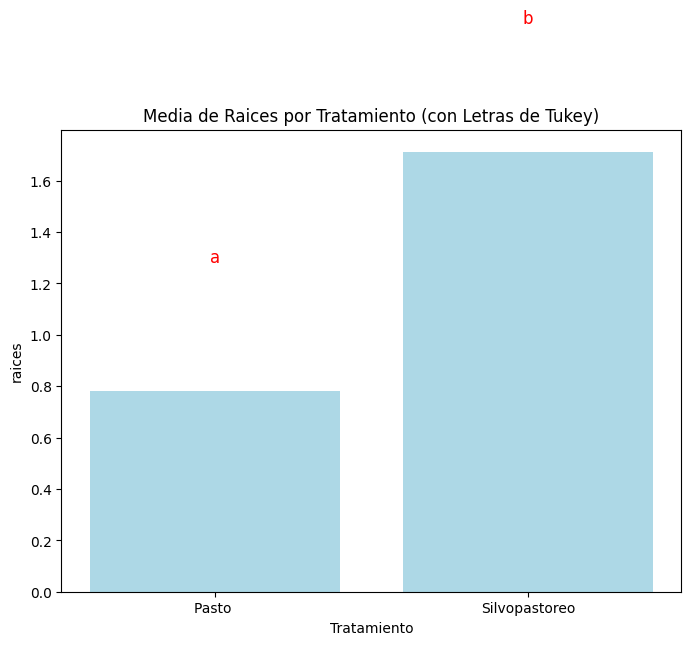

<ipython-input-54-0b65db54567c>:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profundidad = data.groupby('Profundidad')['raices'].mean()


Text(0, 0.5, 'raices')

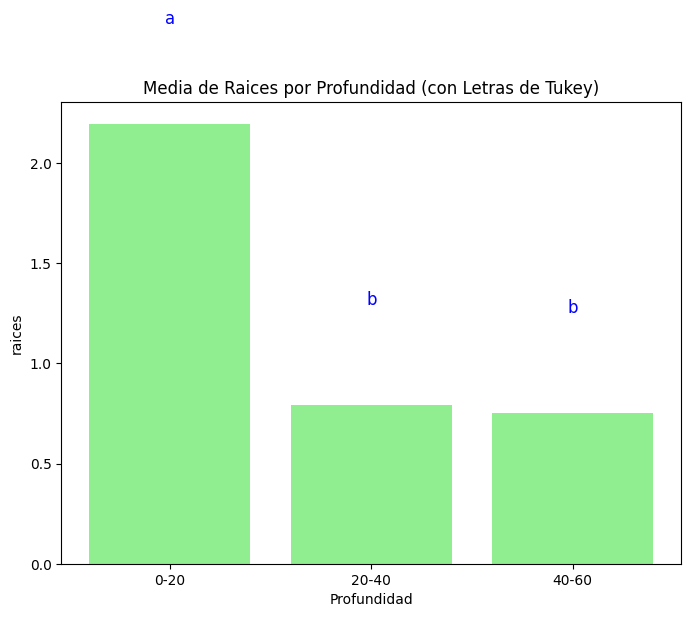

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Cargar archivo desde tu computadora
uploaded = files.upload()  # Subir archivo
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo
data = pd.read_excel(file_name)

# Limpiar nombres de columnas
data.columns = data.columns.str.strip()

# Convertir columnas relevantes a categóricas
data['Tratamiento'] = data['Tratamiento'].astype('category')
data['Profundidad'] = data['Profundidad'].astype('category')
data['Bloque'] = data['Bloque'].astype('category')

# Realizar ANOVA
modelo = ols('raices ~ Tratamiento + Profundidad + Bloque', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nTabla ANOVA:")
print(anova_table)

# Prueba de Tukey para Tratamiento
print("\nPrueba de Tukey para Tratamiento:")
tukey_tratamiento = pairwise_tukeyhsd(data['raices'], data['Tratamiento'], alpha=0.05)
print(tukey_tratamiento)

# Prueba de Tukey para Profundidad
print("\nPrueba de Tukey para Profundidad:")
tukey_profundidad = pairwise_tukeyhsd(data['raices'], data['Profundidad'], alpha=0.05)
print(tukey_profundidad)

# Función para asignar letras de diferencia
def assign_letters(tukey_result):
    groups = {}
    letters = 'abcdefghijklmnopqrstuvwxyz'
    letter_index = 0

    for row in tukey_result.summary().data[1:]:
        group1, group2, reject = row[0], row[1], row[6]
        if not reject:  # Si no hay diferencias significativas
            if group1 in groups:
                groups[group2] = groups[group1]
            elif group2 in groups:
                groups[group1] = groups[group2]
            else:
                groups[group1] = letters[letter_index]
                groups[group2] = letters[letter_index]
        else:  # Si hay diferencias significativas
            if group1 not in groups:
                groups[group1] = letters[letter_index]
                letter_index += 1
            if group2 not in groups:
                groups[group2] = letters[letter_index]
                letter_index += 1
    return groups

# Asignar letras
letras_tratamiento = assign_letters(tukey_tratamiento)
letras_profundidad = assign_letters(tukey_profundidad)

print("\nLetras de agrupación para Tratamiento:")
print(letras_tratamiento)
print("\nLetras de agrupación para Profundidad:")
print(letras_profundidad)

# Gráfico para Tratamiento
plt.figure(figsize=(8, 6))
mean_tratamiento = data.groupby('Tratamiento')['raices'].mean()
plt.bar(mean_tratamiento.index, mean_tratamiento.values, color='lightblue')
for i, (tratamiento, mean) in enumerate(mean_tratamiento.items()):
    plt.text(i, mean + 0.5, letras_tratamiento[tratamiento], ha='center', fontsize=12, color='red')
plt.title('Media de Raices por Tratamiento (con Letras de Tukey)')
plt.xlabel('Tratamiento')
plt.ylabel('raices')
plt.show()

# Gráfico para Profundidad
plt.figure(figsize=(8, 6))
mean_profundidad = data.groupby('Profundidad')['raices'].mean()
plt.bar(mean_profundidad.index, mean_profundidad.values, color='lightgreen')
for i, (profundidad, mean) in enumerate(mean_profundidad.items()):
    plt.text(i, mean + 0.5, letras_profundidad[profundidad], ha='center', fontsize=12, color='blue')
plt.title('Media de Raices por Profundidad (con Letras de Tukey)')
plt.xlabel('Profundidad')
plt.ylabel('raices')

**FINCA LOS ANGELES CARBONO TOTAL**


In [ ]:
# Paso 1: Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas statsmodels scipy openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'")
uploaded = files.upload()

# Cargar los datos en un DataFrame usando pd.read_excel para archivos .xlsx
filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
data = pd.read_excel(filename) # Use pd.read_excel instead of pd.read_csv

# Verificar los primeros registros para confirmar la carga
print("\nDatos cargados:")
print(data.head())

# Paso 4: Ajustar el modelo ANOVA
model = ols('Carbonototal ~ C(Tratamiento) + C(Bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar resultados de ANOVA
print("\nResultados del ANOVA:")
print(anova_table)

# Paso 5: Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(data['Carbonototal'], data['Tratamiento'], alpha=0.05)

# Mostrar resultados de Tukey
print("\nResultados de la prueba de Tukey:")
print(tukey)

Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'


Saving Total Carbono.xlsx to Total Carbono (3).xlsx

Datos cargados:
   Bloque Tratamiento  Carbonototal
0       1  SSP Acacia         128.9
1       1    SSP Teca         111.5
2       1       Pasto          78.6
3       2  SSP Acacia         119.3
4       2    SSP Teca         120.4

Resultados del ANOVA:
                     sum_sq   df          F    PR(>F)
C(Tratamiento)  2411.031667  2.0  23.444873  0.001460
C(Bloque)         36.982500  3.0   0.239745  0.865712
Residual         308.515000  6.0        NaN       NaN

Resultados de la prueba de Tukey:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
     Pasto SSP Acacia   31.075 0.0002  18.8429 43.3071   True
     Pasto   SSP Teca    28.95 0.0003  16.7179 41.1821   True
SSP Acacia   SSP Teca   -2.125   0.88 -14.3571 10.1071  False
-------------------------------------------------------------


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'


Saving Total Carbono.xlsx to Total Carbono (4).xlsx

Datos cargados:
   Bloque Tratamiento  Carbonototal
0       1  SSP Acacia         128.9
1       1    SSP Teca         111.5
2       1       Pasto          78.6
3       2  SSP Acacia         119.3
4       2    SSP Teca         120.4

Resultados del ANOVA:
                     sum_sq   df          F    PR(>F)
C(Tratamiento)  2411.031667  2.0  23.444873  0.001460
C(Bloque)         36.982500  3.0   0.239745  0.865712
Residual         308.515000  6.0        NaN       NaN

Resultados de la prueba de Tukey:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
     Pasto SSP Acacia   31.075 0.0002  18.8429 43.3071   True
     Pasto   SSP Teca    28.95 0.0003  16.7179 41.1821   True
SSP Acacia   SSP Teca   -2.125   0.88 -14.3571 10.1071  False
-------------------------------------------------------------


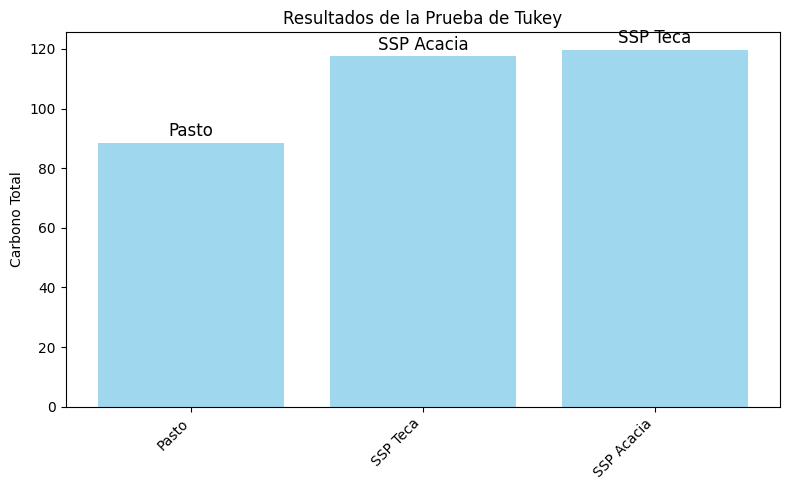

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas statsmodels matplotlib openpyxl scipy

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import numpy as np

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos
print("\nDatos cargados:")
print(data.head())

# Paso 4: Realizar ANOVA
model = ols('Carbonototal ~ C(Tratamiento) + C(Bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nResultados del ANOVA:")
print(anova_table)

# Paso 5: Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(data['Carbonototal'], data['Tratamiento'], alpha=0.05)
print("\nResultados de la prueba de Tukey:")
print(tukey)

# Paso 6: Asignar letras según las diferencias significativas
from statsmodels.stats.multicomp import MultiComparison

# Crear un diccionario para asignar las letras
mc = MultiComparison(data['Carbonototal'], data['Tratamiento'])
letters_result = mc.tukeyhsd().groupsunique

# Ordenar tratamientos y sus medias
mean_values = data.groupby('Tratamiento')['Carbonototal'].mean()
sorted_means = mean_values.sort_values()
x_pos = np.arange(len(sorted_means))

# Asignar las letras manualmente
letters = dict(zip(sorted_means.index, tukey.groupsunique))

# Paso 7: Graficar las diferencias con letras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x_pos, sorted_means, color='skyblue', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_means.index, rotation=45, ha='right')
ax.set_ylabel('Carbonototal')
ax.set_title('Resultados de la Prueba de Tukey')

# Agregar letras sobre las barras
for i, treatment in enumerate(sorted_means.index):
    ax.text(x_pos[i], sorted_means[treatment] + 1, letters[treatment],
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'


Saving Total Carbono.xlsx to Total Carbono (5).xlsx

Datos cargados:
   Bloque Tratamiento  Carbonototal
0       1  SSP Acacia         128.9
1       1    SSP Teca         111.5
2       1       Pasto          78.6
3       2  SSP Acacia         119.3
4       2    SSP Teca         120.4

Resultados del ANOVA:
                     sum_sq   df          F    PR(>F)
C(Tratamiento)  2411.031667  2.0  23.444873  0.001460
C(Bloque)         36.982500  3.0   0.239745  0.865712
Residual         308.515000  6.0        NaN       NaN

Resultados de la prueba de Tukey:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
     Pasto SSP Acacia   31.075 0.0002  18.8429 43.3071   True
     Pasto   SSP Teca    28.95 0.0003  16.7179 41.1821   True
SSP Acacia   SSP Teca   -2.125   0.88 -14.3571 10.1071  False
-------------------------------------------------------------

Letras

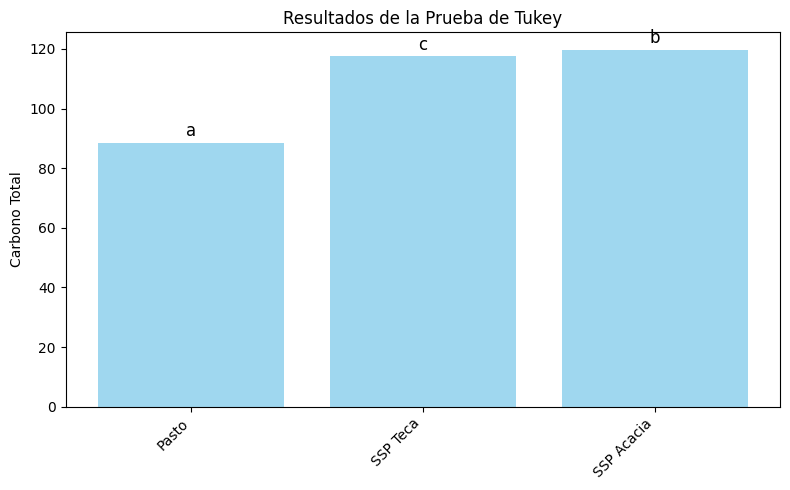

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas statsmodels matplotlib openpyxl scipy

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import numpy as np

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos
print("\nDatos cargados:")
print(data.head())

# Paso 4: Realizar ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Carbonototal ~ C(Tratamiento) + C(Bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nResultados del ANOVA:")
print(anova_table)

# Paso 5: Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(data['Carbonototal'], data['Tratamiento'], alpha=0.05)
print("\nResultados de la prueba de Tukey:")
print(tukey)

# Paso 6: Asignar letras según las diferencias significativas
def assign_letters(tukey_result):
    groups = tukey_result.groupsunique
    data = tukey_result._results_table.data[1:]
    letter_dict = {group: "" for group in groups}

    # Crear clusters para las letras
    clusters = []
    for row in data:
        g1, g2, _, _, reject = row[:5]
        if not reject:  # Si no hay diferencias significativas
            cluster_found = False
            for cluster in clusters:
                if g1 in cluster or g2 in cluster:
                    cluster.update([g1, g2])
                    cluster_found = True
                    break
            if not cluster_found:
                clusters.append(set([g1, g2]))

    # Asignar letras a los clusters
    used_letters = []
    for i, cluster in enumerate(clusters):
        letter = chr(97 + i)  # Asignar letras (a, b, c...)
        used_letters.append(letter)
        for group in cluster:
            letter_dict[group] += letter

    # Tratamientos que no están en ningún cluster reciben letras únicas
    for group in groups:
        if letter_dict[group] == "":
            letter_dict[group] = chr(97 + len(used_letters))
            used_letters.append(letter_dict[group])

    return letter_dict

letters = assign_letters(tukey)
print("\nLetras asignadas a los tratamientos:")
print(letters)

# Paso 7: Graficar las diferencias con letras
mean_values = data.groupby('Tratamiento')['Carbonototal'].mean()
sorted_means = mean_values.sort_values()
x_pos = np.arange(len(sorted_means))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x_pos, sorted_means, color='skyblue', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_means.index, rotation=45, ha='right')
ax.set_ylabel('Carbono Total')
ax.set_title('Resultados de la Prueba de Tukey')

# Agregar letras sobre las barras
for i, treatment in enumerate(sorted_means.index):
    ax.text(x_pos[i], sorted_means[treatment] + 1, letters[treatment],
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbono'


Saving Total Carbono.xlsx to Total Carbono (19).xlsx

Datos cargados:
    Bloque Tratamiento  Carbono
0        1  SSP Acacia    128.9
1        1    SSP Teca    111.5
2        1       Pasto     78.6
3        2  SSP Acacia    119.3
4        2    SSP Teca    120.4
5        2       Pasto     91.3
6        3  SSP Acacia    119.4
7        3    SSP Teca    119.0
8        3       Pasto     92.0
9        4  SSP Acacia    110.7
10       4    SSP Teca    118.9
11       4       Pasto     92.1

Prueba de Shapiro-Wilk:
Estadístico: 0.8693544617137339, p-valor: 0.06412968601476357

Prueba de Kolmogorov-Smirnov:
Estadístico: 0.244232005815338, p-valor: 0.40582510084248014

Prueba de D'Agostino y Pearson:
Estadístico: 1.7076898449751066, p-valor: 0.4257747099492609


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


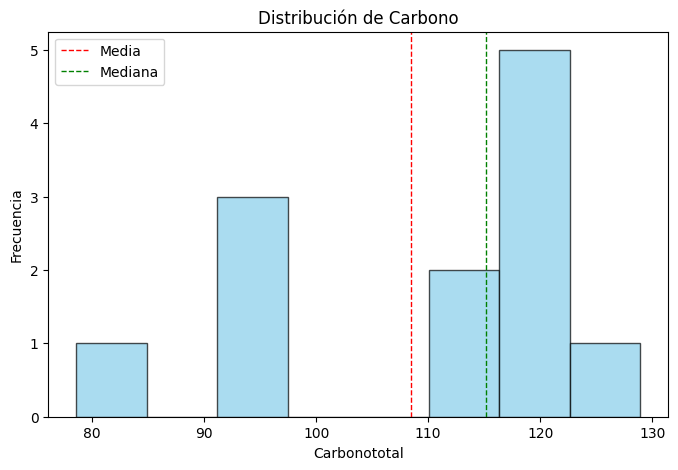

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy matplotlib openpyxl
# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbono'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos cargados
print("\nDatos cargados:")
print(data)

# Paso 4: Probar la normalidad para la variable 'Carbono'

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(data['Carbono'])
print("\nPrueba de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_stat}, p-valor: {shapiro_p}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(data['Carbono'], 'norm', args=(data['Carbono'].mean(), data['Carbono'].std()))
print("\nPrueba de Kolmogorov-Smirnov:")
print(f"Estadístico: {ks_stat}, p-valor: {ks_p}")

# D'Agostino and Pearson's Test
dagostino_stat, dagostino_p = normaltest(data['Carbono'])
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {dagostino_stat}, p-valor: {dagostino_p}")

# Paso 5: Visualizar la distribución
plt.figure(figsize=(8, 5))
plt.hist(data['Carbono'], bins=8, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(data['Carbono'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(data['Carbono'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Carbono')
plt.xlabel('Carbonototal')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'


Saving Total Carbono.xlsx to Total Carbono (22).xlsx

Datos cargados:
   Bloque Tratamiento  Carbono
0       1  SSP Acacia    128.9
1       1    SSP Teca    111.5
2       1       Pasto     78.6
3       2  SSP Acacia    119.3
4       2    SSP Teca    120.4

Prueba de Bartlett (para homogeneidad de varianzas en datos normales):
Estadístico: 0.9633428239127914, p-valor: 0.6177500136875004

Prueba de Levene (para homogeneidad de varianzas en datos normales y no normales):
Estadístico: 0.20364988594106456, p-valor: 0.8194054856433328

Prueba de Fligner-Killeen (homogeneidad robusta de varianzas):
Estadístico: 0.8974186980891622, p-valor: 0.6384516383074923


<Figure size 800x500 with 0 Axes>

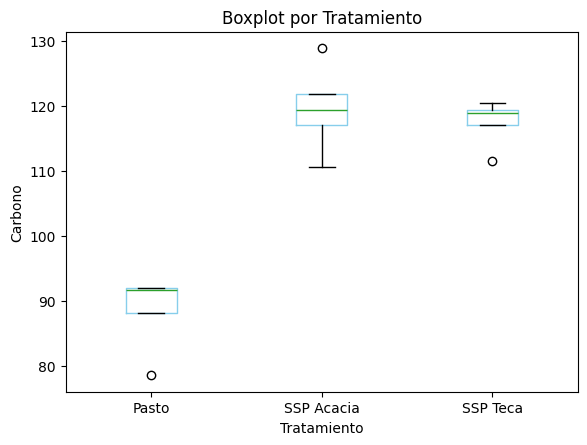

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import bartlett, levene, fligner
import matplotlib.pyplot as plt
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Paso 4: Probar homocedasticidad

# Separar los datos por grupos de 'Tratamiento'
# Change 'Carbonototal' to 'Carbono' to match your column name
grupos = [data[data['Tratamiento'] == t]['Carbono'] for t in data['Tratamiento'].unique()]

# Prueba de Bartlett (para datos normales)
bartlett_stat, bartlett_p = bartlett(*grupos)
print("\nPrueba de Bartlett (para homogeneidad de varianzas en datos normales):")
print(f"Estadístico: {bartlett_stat}, p-valor: {bartlett_p}")

# Prueba de Levene (para datos normales y no normales)
levene_stat, levene_p = levene(*grupos)
print("\nPrueba de Levene (para homogeneidad de varianzas en datos normales y no normales):")
print(f"Estadístico: {levene_stat}, p-valor: {levene_p}")

# Prueba de Fligner-Killeen (robusta y no paramétrica)
fligner_stat, fligner_p = fligner(*grupos)
print("\nPrueba de Fligner-Killeen (homogeneidad robusta de varianzas):")
print(f"Estadístico: {fligner_stat}, p-valor: {fligner_p}")

# Paso 5: Visualizar varianzas
plt.figure(figsize=(8, 5))
# Change 'Carbonototal' to 'Carbono' to match your column name
data.boxplot(column='Carbono', by='Tratamiento', grid=False, color=dict(boxes='skyblue', whiskers='black'))
plt.title('Boxplot por Tratamiento')
plt.suptitle('')  # Quitar título adicional
plt.xlabel('Tratamiento')
plt.ylabel('Carbono')
plt.show()

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy statsmodels matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
from google.colab import files
import numpy as np

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbono'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Paso 4: Crear tabla de contingencia
# Para esta prueba, debemos seleccionar dos variables categóricas (por ejemplo, Bloque y Tratamiento)
contingencia = pd.crosstab(data['Bloque'], data['Tratamiento'])
print("\nTabla de contingencia:")
print(contingencia)

# Paso 5: Prueba de Chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingencia)
print("\nPrueba de Chi-cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"p-valor: {p_val}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas bajo independencia:")
print(expected)

# Paso 6: Prueba exacta de Fisher (si la tabla es 2x2)
if contingencia.shape == (2, 2):
    fisher_stat, fisher_p = fisher_exact(contingencia)
    print("\nPrueba exacta de Fisher:")
    print(f"Estadístico: {fisher_stat}")
    print(f"p-valor: {fisher_p}")
else:
    print("\nLa prueba exacta de Fisher no es aplicable ya que la tabla no es 2x2.")


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbono'


Saving Total Carbono.xlsx to Total Carbono.xlsx

Datos cargados:
   Bloque Tratamiento  Carbono
0       1  SSP Acacia    128.9
1       1    SSP Teca    111.5
2       1       Pasto     78.6
3       2  SSP Acacia    119.3
4       2    SSP Teca    120.4

Tabla de contingencia:
Tratamiento  Pasto  SSP Acacia  SSP Teca
Bloque                                  
1                1           1         1
2                1           1         1
3                1           1         1
4                1           1         1

Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 0.0
p-valor: 1.0
Grados de libertad: 6

Frecuencias esperadas bajo independencia:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

La prueba exacta de Fisher no es aplicable ya que la tabla no es 2x2.


**Carbono Suelo Por profundidad**

Sube tu archivo con las columnas 'Bloque', 'Tratamiento', 'Profundidad' y 'COS'


Saving Carbono Suelo Prof Los Angeles.xlsx to Carbono Suelo Prof Los Angeles (3).xlsx

Datos cargados:
   Bloque Tratamiento  Profundidad   COS
0       1   SSP Acacia        0-20  58.8
1       1   SSP Acacia       20-40  23.2
2       1   SSP Acacia       40-60  13.2
3       1     SSP Teca        0-20  46.4
4       1     SSP Teca       20-40  28.0

Columnas del archivo cargado:
Index(['Bloque', 'Tratamiento ', 'Profundidad', 'COS'], dtype='object')

Columnas después de la corrección:
Index(['Bloque', 'Tratamiento', 'Profundidad', 'COS'], dtype='object')

Resultados del ANOVA:
                                    sum_sq    df           F        PR(>F)
C(Tratamiento)                  195.860000   2.0    4.387809  2.376426e-02
C(Profundidad)                 5226.526667   2.0  117.088734  4.164040e-13
C(Bloque)                         8.109722   3.0    0.121120  9.467679e-01
C(Tratamiento):C(Profundidad)   327.823333   4.0    3.672077  1.804395e-02
Residual                        535.647778 

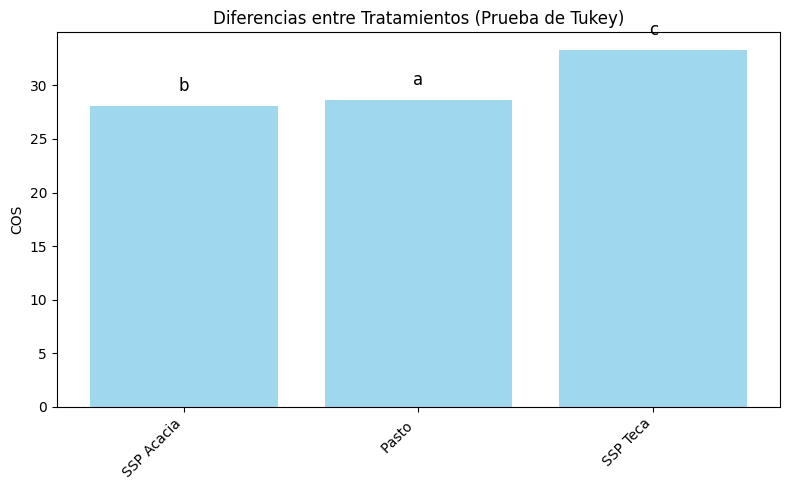


Resultados de la prueba de Tukey (Profundidades):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  0-20  20-40 -22.1167    0.0 -27.8141 -16.4193   True
  0-20  40-60 -27.9833    0.0 -33.6807 -22.2859   True
 20-40  40-60  -5.8667 0.0425 -11.5641  -0.1693   True
------------------------------------------------------


In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas statsmodels matplotlib openpyxl scipy

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import numpy as np

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento', 'Profundidad' y 'COS'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos
print("\nDatos cargados:")
print(data.head())

# Paso 4: Verificar y corregir los nombres de las columnas
print("\nColumnas del archivo cargado:")
print(data.columns)

# Eliminar espacios antes/después de los nombres de las columnas
data.columns = data.columns.str.strip()

# Renombrar columnas manualmente si es necesario
data = data.rename(columns={
    'Bloque': 'Bloque',
    'Tratamiento ': 'Tratamiento',  # Corrige errores como espacios adicionales
    'Profundidad ': 'Profundidad',
    'COS ': 'COS'
})

print("\nColumnas después de la corrección:")
print(data.columns)

# Paso 5: Realizar ANOVA con factores 'Tratamiento' y 'Profundidad'
model = ols('COS ~ C(Tratamiento) * C(Profundidad) + C(Bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nResultados del ANOVA:")
print(anova_table)

# Paso 6: Realizar la prueba de Tukey para los tratamientos
tukey = pairwise_tukeyhsd(data['COS'], data['Tratamiento'], alpha=0.05)
print("\nResultados de la prueba de Tukey (Tratamientos):")
print(tukey)

# Paso 7: Graficar las diferencias con letras para tratamientos
mean_values = data.groupby('Tratamiento')['COS'].mean()
sorted_means = mean_values.sort_values()
x_pos = np.arange(len(sorted_means))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x_pos, sorted_means, color='skyblue', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_means.index, rotation=45, ha='right')
ax.set_ylabel('COS')
ax.set_title('Diferencias entre Tratamientos (Prueba de Tukey)')

# Asignar letras según Tukey
def assign_letters_tukey(tukey_result):
    groups = tukey_result.groupsunique
    data = tukey_result._results_table.data[1:]
    letter_dict = {group: "" for group in groups}
    clusters = []

    for row in data:
        g1, g2, _, _, reject = row[:5]
        if not reject:
            cluster_found = False
            for cluster in clusters:
                if g1 in cluster or g2 in cluster:
                    cluster.update([g1, g2])
                    cluster_found = True
                    break
            if not cluster_found:
                clusters.append(set([g1, g2]))

    used_letters = []
    for i, cluster in enumerate(clusters):
        letter = chr(97 + i)  # Asignar letras (a, b, c...)
        used_letters.append(letter)
        for group in cluster:
            letter_dict[group] += letter

    for group in groups:
        if letter_dict[group] == "":
            letter_dict[group] = chr(97 + len(used_letters))
            used_letters.append(letter_dict[group])

    return letter_dict

letters = assign_letters_tukey(tukey)

# Agregar letras al gráfico
for i, treatment in enumerate(sorted_means.index):
    ax.text(x_pos[i], sorted_means[treatment] + 1, letters[treatment],
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Paso 8: Realizar la prueba de Tukey para las profundidades
tukey_depth = pairwise_tukeyhsd(data['COS'], data['Profundidad'], alpha=0.05)
print("\nResultados de la prueba de Tukey (Profundidades):")
print(tukey_depth)


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'


Saving Carbono Suelo Prof Los Angeles.xlsx to Carbono Suelo Prof Los Angeles.xlsx

Datos cargados:
    Bloque Tratamiento  Profundidad   COS
0        1   SSP Acacia        0-20  58.8
1        1   SSP Acacia       20-40  23.2
2        1   SSP Acacia       40-60  13.2
3        1     SSP Teca        0-20  46.4
4        1     SSP Teca       20-40  28.0
5        1     SSP Teca       40-60  19.4
6        1       Pasto         0-20  41.8
7        1       Pasto        20-40  20.3
8        1       Pasto        40-60  13.5
9        2   SSP Acacia        0-20  42.3
10       2   SSP Acacia       20-40  23.2
11       2   SSP Acacia       40-60  12.0
12       2     SSP Teca        0-20  54.1
13       2     SSP Teca       20-40  25.9
14       2     SSP Teca       40-60  22.6
15       2       Pasto         0-20  41.0
16       2       Pasto        20-40  25.1
17       2       Pasto        40-60  22.6
18       3   SSP Acacia        0-20  45.9
19       3   SSP Acacia       20-40  25.1
20       3   SSP Ac

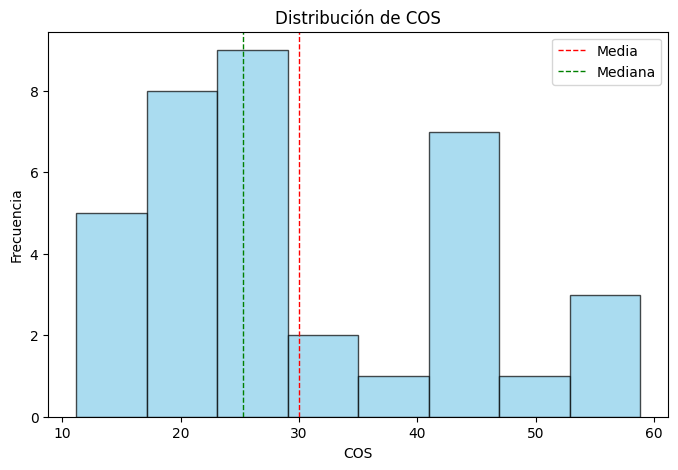

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos cargados
print("\nDatos cargados:")
print(data)

# Paso 4: Probar la normalidad para la variable 'COS'

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(data['COS'])
print("\nPrueba de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_stat}, p-valor: {shapiro_p}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(data['COS'], 'norm', args=(data['COS'].mean(), data['COS'].std()))
print("\nPrueba de Kolmogorov-Smirnov:")
print(f"Estadístico: {ks_stat}, p-valor: {ks_p}")

# D'Agostino and Pearson's Test
dagostino_stat, dagostino_p = normaltest(data['COS'])
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {dagostino_stat}, p-valor: {dagostino_p}")

# Paso 5: Visualizar la distribución
plt.figure(figsize=(8, 5))
plt.hist(data['COS'], bins=8, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(data['COS'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(data['COS'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de COS')
plt.xlabel('COS')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import bartlett, levene, fligner
import matplotlib.pyplot as plt
from google.colab import files

# Paso 2: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'")
uploaded = files.upload()

# Paso 3: Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Paso 4: Verificar nombres de columnas
print("\nNombres de las columnas en los datos cargados:")
print(data.columns)

# Paso 5: Renombrar columnas si es nec


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'


Saving Carbono Suelo Prof Los Angeles.xlsx to Carbono Suelo Prof Los Angeles (8).xlsx

Nombres de las columnas en los datos cargados:
Index(['Bloque', 'Tratamiento ', 'Profundidad', 'COS'], dtype='object')


In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy statsmodels matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Paso 4: Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Paso 5: Limpiar y validar columnas
expected_columns = ['Bloque', 'Tratamiento', 'COS']
data.columns = data.columns.str.strip()  # Quitar espacios adicionales en nombres de columnas

# Verificar que las columnas necesarias existan
for col in expected_columns[:2]:  # Solo se necesitan 'Bloque' y 'Tratamiento' para las pruebas
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no existe en el archivo cargado.")

# Asegurar que las columnas 'Bloque' y 'Tratamiento' sean categóricas
data['Bloque'] = data['Bloque'].astype(str)
data['Tratamiento'] = data['Tratamiento'].astype(str)

# Paso 6: Crear tabla de contingencia
contingencia = pd.crosstab(data['Bloque'], data['Tratamiento'])
print("\nTabla de contingencia:")
print(contingencia)

# Paso 7: Prueba de Chi-cuadrado
try:
    chi2_stat, p_val, dof, expected = chi2_contingency(contingencia)
    print("\nPrueba de Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi2_stat}")
    print(f"p-valor: {p_val}")
    print(f"Grados de libertad: {dof}")
    print("\nFrecuencias esperadas bajo independencia:")
    print(expected)
except ValueError as e:
    print(f"\nError al realizar la prueba de Chi-cuadrado: {e}")

# Paso 8: Prueba exacta de Fisher (si la tabla es 2x2)
if contingencia.shape == (2, 2):
    fisher_stat, fisher_p = fisher_exact(contingencia)
    print("\nPrueba exacta de Fisher:")
    print(f"Estadístico: {fisher_stat}")
    print(f"p-valor: {fisher_p}")
else:
    print("\nLa prueba exacta de Fisher no es aplicable ya que la tabla no es 2x2.")


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'


Saving Carbono Suelo Prof Los Angeles.xlsx to Carbono Suelo Prof Los Angeles (15).xlsx

Datos cargados:
   Bloque Tratamiento  Profundidad   COS
0       1   SSP Acacia        0-20  58.8
1       1   SSP Acacia       20-40  23.2
2       1   SSP Acacia       40-60  13.2
3       1     SSP Teca        0-20  46.4
4       1     SSP Teca       20-40  28.0

Tabla de contingencia:
Tratamiento  Pasto   SSP Acacia  SSP Teca
Bloque                                   
1                 3           3         3
2                 3           3         3
3                 3           3         3
4                 3           3         3

Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 0.0
p-valor: 1.0
Grados de libertad: 6

Frecuencias esperadas bajo independencia:
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]

La prueba exacta de Fisher no es aplicable ya que la tabla no es 2x2.


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'


Saving Carbono Suelo Prof Los Angeles.xlsx to Carbono Suelo Prof Los Angeles (18).xlsx

Datos cargados:
   Bloque Tratamiento  Profundidad   COS
0       1   SSP Acacia        0-20  58.8
1       1   SSP Acacia       20-40  23.2
2       1   SSP Acacia       40-60  13.2
3       1     SSP Teca        0-20  46.4
4       1     SSP Teca       20-40  28.0

Prueba de Bartlett (para homogeneidad de varianzas en datos normales):
Estadístico: 2.0133779905958336, p-valor: 0.3654269089518827

Prueba de Levene (para homogeneidad de varianzas en datos normales y no normales):
Estadístico: 0.4118415661513553, p-valor: 0.6657868393222488

Prueba de Fligner-Killeen (homogeneidad robusta de varianzas):
Estadístico: 0.8260824804309116, p-valor: 0.6616349962954007


<Figure size 800x500 with 0 Axes>

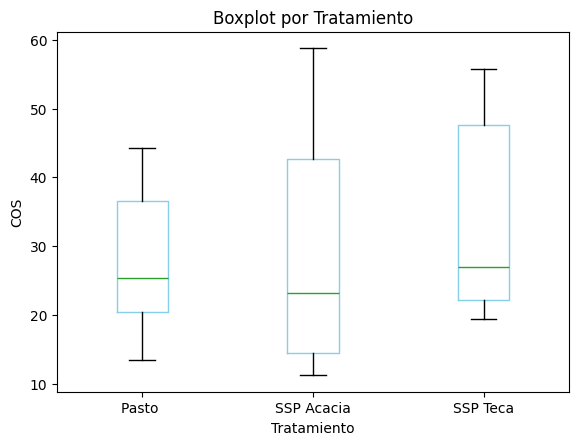

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import bartlett, levene, fligner
import matplotlib.pyplot as plt
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Paso 4: Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Validar que las columnas requeridas existan
expected_columns = ['Bloque', 'Tratamiento', 'COS']
data.columns = data.columns.str.strip()  # Quitar espacios adicionales en los nombres de las columnas

for col in expected_columns:
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no existe en el archivo cargado. Verifica los nombres de las columnas.")

# Convertir Carbonototal a numérico y manejar errores
try:
    data['Carbonototal'] = pd.to_numeric(data['COS'], errors='coerce')
except Exception as e:
    raise ValueError(f"Error al convertir 'COS' a valores numéricos: {e}")

# Eliminar filas con valores NaN en COS
data = data.dropna(subset=['COS'])

# Paso 5: Probar homocedasticidad
# Separar los datos por grupos de 'Tratamiento'
grupos = [data[data['Tratamiento'] == t]['COS'] for t in data['Tratamiento'].unique()]

# Prueba de Bartlett (para datos normales)
try:
    bartlett_stat, bartlett_p = bartlett(*grupos)
    print("\nPrueba de Bartlett (para homogeneidad de varianzas en datos normales):")
    print(f"Estadístico: {bartlett_stat}, p-valor: {bartlett_p}")
except ValueError as e:
    print(f"\nError en la prueba de Bartlett: {e}")

# Prueba de Levene (para datos normales y no normales)
try:
    levene_stat, levene_p = levene(*grupos)
    print("\nPrueba de Levene (para homogeneidad de varianzas en datos normales y no normales):")
    print(f"Estadístico: {levene_stat}, p-valor: {levene_p}")
except ValueError as e:
    print(f"\nError en la prueba de Levene: {e}")

# Prueba de Fligner-Killeen (robusta y no paramétrica)
try:
    fligner_stat, fligner_p = fligner(*grupos)
    print("\nPrueba de Fligner-Killeen (homogeneidad robusta de varianzas):")
    print(f"Estadístico: {fligner_stat}, p-valor: {fligner_p}")
except ValueError as e:
    print(f"\nError en la prueba de Fligner-Killeen: {e}")

# Paso 6: Visualizar varianzas
try:
    plt.figure(figsize=(8, 5))
    data.boxplot(column='COS', by='Tratamiento', grid=False, color=dict(boxes='skyblue', whiskers='black'))
    plt.title('Boxplot por Tratamiento')
    plt.suptitle('')  # Quitar título adicional
    plt.xlabel('Tratamiento')
    plt.ylabel('COS')
    plt.show()
except Exception as e:
    print(f"\nError al generar el boxplot: {e}")


Carbono Profundidad Raices


Sube tu archivo con las columnas 'Bloque', 'Tratamiento', 'Profundidad' y 'Raices'


Saving Carbono raices prof Los Angeles.xlsx to Carbono raices prof Los Angeles (3).xlsx

Datos cargados:
   Bloque Tratamiento  Profundidad  Raices 
0       1   SSP Acacia        0-20     3.59
1       1   SSP Acacia       20-40     1.12
2       1   SSP Acacia       40-60     0.32
3       1     SSP Teca        0-20     3.45
4       1     SSP Teca       20-40     0.94

Columnas del archivo cargado:
Index(['Bloque', 'Tratamiento ', 'Profundidad', 'Raices '], dtype='object')

Columnas después de la corrección:
Index(['Bloque', 'Tratamiento', 'Profundidad', 'Raices'], dtype='object')

Resultados del ANOVA:
                                  sum_sq    df           F        PR(>F)
C(Tratamiento)                  5.369939   2.0   61.801049  3.415266e-10
C(Profundidad)                 54.561506   2.0  627.932333  1.890455e-21
C(Bloque)                       0.010186   3.0    0.078153  9.712172e-01
C(Tratamiento):C(Profundidad)   4.273778   4.0   24.592826  3.448156e-08
Residual                  

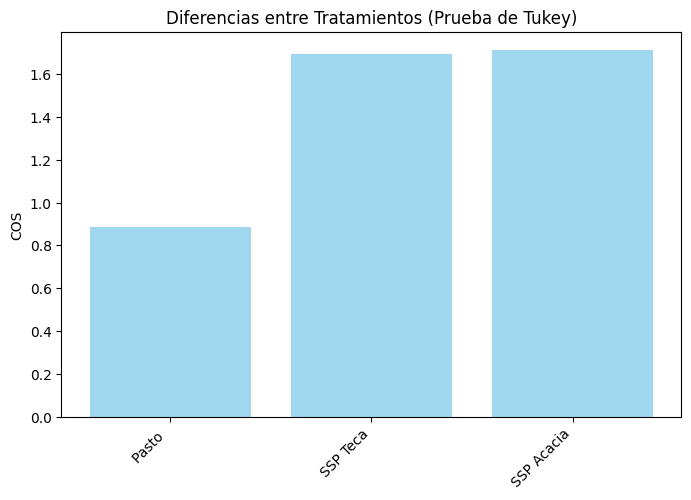

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas statsmodels matplotlib openpyxl scipy

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
import numpy as np
import statsmodels.api as sm # Import statsmodels.api and assign it to the alias 'sm'

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento', 'Profundidad' y 'Raices'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Verificar los datos
print("\nDatos cargados:")
print(data.head())

# Paso 4: Verificar y corregir los nombres de las columnas
print("\nColumnas del archivo cargado:")
print(data.columns)

# Eliminar espacios antes/después de los nombres de las columnas
data.columns = data.columns.str.strip()

# Renombrar columnas manualmente si es necesario
data = data.rename(columns={
    'Bloque': 'Bloque',
    'Tratamiento ': 'Tratamiento',  # Corrige errores como espacios adicionales
    'Profundidad ': 'Profundidad',
    'Raices ': 'Raices'
})

print("\nColumnas después de la corrección:")
print(data.columns)

# Paso 5: Realizar ANOVA con factores 'Tratamiento' y 'Profundidad'
model = ols('Raices ~ C(Tratamiento) * C(Profundidad) + C(Bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nResultados del ANOVA:")
print(anova_table)

# Paso 6: Realizar la prueba de Tukey para los tratamientos
tukey = pairwise_tukeyhsd(data['Raices'], data['Tratamiento'], alpha=0.05)
print("\nResultados de la prueba de Tukey (Tratamientos):")
print(tukey)

# Paso 7: Graficar las diferencias con letras para tratamientos
mean_values = data.groupby('Tratamiento')['Raices'].mean()
sorted_means = mean_values.sort_values()
x_pos = np.arange(len(sorted_means))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x_pos, sorted_means, color='skyblue', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_means.index, rotation=45, ha='right')
ax.set_ylabel('COS')
ax.set_title('Diferencias entre Tratamientos (Prueba de Tukey)')

# Asignar letras según Tukey
def assign_letters_tukey(tukey_result):
    groups = tukey_result.groupsunique
    data = tukey_result._results_table.data[1:]
    letter_dict = {group: "" for group in groups}
    clusters = []

    for row in data:
        g1, g2, _, _, reject = row[:5]
        if not reject:
            cluster_found = False
            for cluster in clusters:
                if g1 in cluster or g2 in cluster:
                    cluster.update([g
                                    ])

Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Raices'


Saving Carbono raices prof Los Angeles.xlsx to Carbono raices prof Los Angeles (7).xlsx

Nombres de las columnas cargadas después de limpiar los espacios:
Index(['Bloque', 'Tratamiento', 'Profundidad', 'Raices'], dtype='object')

Datos cargados:
   Bloque Tratamiento Profundidad  Raices
0       1  SSP Acacia        0-20    3.59
1       1  SSP Acacia       20-40    1.12
2       1  SSP Acacia       40-60    0.32
3       1    SSP Teca        0-20    3.45
4       1    SSP Teca       20-40    0.94

Prueba de Shapiro-Wilk:
Estadístico: 0.7770320037390721, p-valor: 5.8794225112601696e-06

Prueba de Kolmogorov-Smirnov:
Estadístico: 0.2680980480460655, p-valor: 0.008942955638883143

Prueba de D'Agostino y Pearson:
Estadístico: 6.678986128314338, p-valor: 0.0354549265397628


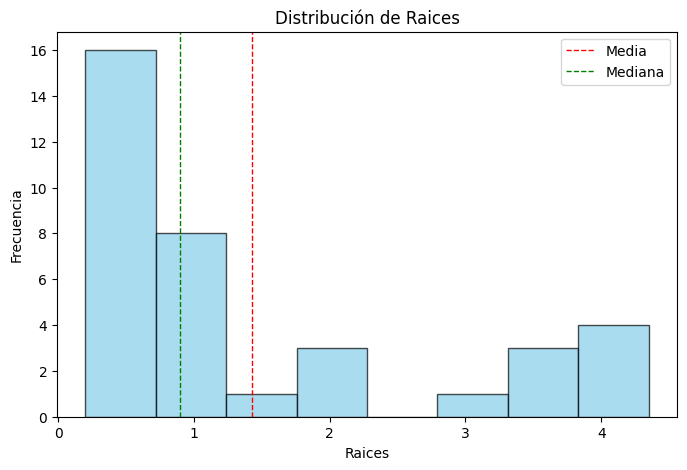

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Raices'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Limpiar los nombres de las columnas (eliminar espacios adicionales)
data.columns = data.columns.str.strip()

# Verificar los nombres de las columnas cargadas
print("\nNombres de las columnas cargadas después de limpiar los espacios:")
print(data.columns)

# Asegurarse de que la columna 'Raices' existe
if 'Raices' not in data.columns:
    raise ValueError("La columna 'Raices' no se encuentra en el archivo. Revisa el nombre exacto de la columna.")

# Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Paso 4: Probar la normalidad para la variable 'Raices'
# Asegúrate de que 'Raices' no tenga valores nulos (NaN)
if data['Raices'].isnull().sum() > 0:
    print("La columna 'Raices' contiene valores nulos. Se eliminarán o reemplazarán.")
    data = data.dropna(subset=['Raices'])  # O usa data['Raices'].fillna(0) para reemplazar valores nulos

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(data['Raices'])
print("\nPrueba de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_stat}, p-valor: {shapiro_p}")

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(data['Raices'], 'norm', args=(data['Raices'].mean(), data['Raices'].std()))
print("\nPrueba de Kolmogorov-Smirnov:")
print(f"Estadístico: {ks_stat}, p-valor: {ks_p}")

# D'Agostino and Pearson's Test
dagostino_stat, dagostino_p = normaltest(data['Raices'])
print("\nPrueba de D'Agostino y Pearson:")
print(f"Estadístico: {dagostino_stat}, p-valor: {dagostino_p}")

# Paso 5: Visualizar la distribución
plt.figure(figsize=(8, 5))
plt.hist(data['Raices'], bins=8, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(data['Raices'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(data['Raices'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Raices')
plt.xlabel('Raices')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



^C
Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Raices'


Saving Carbono raices prof Los Angeles.xlsx to Carbono raices prof Los Angeles (8).xlsx

Datos cargados:
   Bloque Tratamiento  Profundidad  Raices 
0       1   SSP Acacia        0-20     3.59
1       1   SSP Acacia       20-40     1.12
2       1   SSP Acacia       40-60     0.32
3       1     SSP Teca        0-20     3.45
4       1     SSP Teca       20-40     0.94

Prueba de Bartlett (para homogeneidad de varianzas en datos normales):
Estadístico: 5.142535668848675, p-valor: 0.07643857251052612

Prueba de Levene (para homogeneidad de varianzas en datos normales y no normales):
Estadístico: 1.0098190093033648, p-valor: 0.3752647218371942

Prueba de Fligner-Killeen (homogeneidad robusta de varianzas):
Estadístico: 2.1186355963123082, p-valor: 0.34669224376116736


<Figure size 800x500 with 0 Axes>

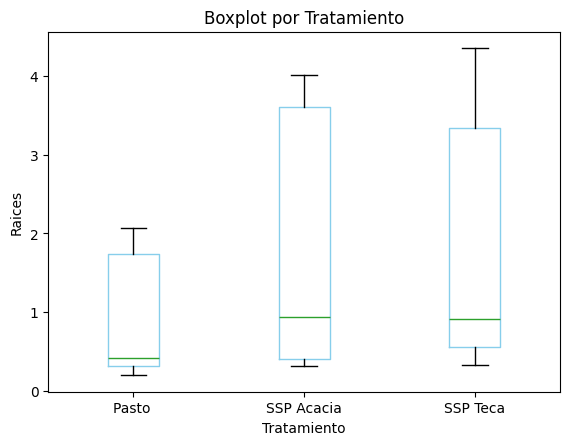

In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import bartlett, levene, fligner
import matplotlib.pyplot as plt
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Raices'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Paso 4: Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Validar que las columnas requeridas existan
expected_columns = ['Bloque', 'Tratamiento', 'Raices']
data.columns = data.columns.str.strip()  # Quitar espacios adicionales en los nombres de las columnas

for col in expected_columns:
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no existe en el archivo cargado. Verifica los nombres de las columnas.")

# Convertir Raices a numérico y manejar errores
try:
    data['Raices'] = pd.to_numeric(data['Raices'], errors='coerce')
except Exception as e:
    raise ValueError(f"Error al convertir 'Raices' a valores numéricos: {e}")

# Eliminar filas con valores NaN en Carbonototal
data = data.dropna(subset=['Raices'])

# Paso 5: Probar homocedasticidad
# Separar los datos por grupos de 'Tratamiento'
grupos = [data[data['Tratamiento'] == t]['Raices'] for t in data['Tratamiento'].unique()]

# Prueba de Bartlett (para datos normales)
try:
    bartlett_stat, bartlett_p = bartlett(*grupos)
    print("\nPrueba de Bartlett (para homogeneidad de varianzas en datos normales):")
    print(f"Estadístico: {bartlett_stat}, p-valor: {bartlett_p}")
except ValueError as e:
    print(f"\nError en la prueba de Bartlett: {e}")

# Prueba de Levene (para datos normales y no normales)
try:
    levene_stat, levene_p = levene(*grupos)
    print("\nPrueba de Levene (para homogeneidad de varianzas en datos normales y no normales):")
    print(f"Estadístico: {levene_stat}, p-valor: {levene_p}")
except ValueError as e:
    print(f"\nError en la prueba de Levene: {e}")

# Prueba de Fligner-Killeen (robusta y no paramétrica)
try:
    fligner_stat, fligner_p = fligner(*grupos)
    print("\nPrueba de Fligner-Killeen (homogeneidad robusta de varianzas):")
    print(f"Estadístico: {fligner_stat}, p-valor: {fligner_p}")
except ValueError as e:
    print(f"\nError en la prueba de Fligner-Killeen: {e}")

# Paso 6: Visualizar varianzas
try:
    plt.figure(figsize=(8, 5))
    data.boxplot(column='Raices', by='Tratamiento', grid=False, color=dict(boxes='skyblue', whiskers='black'))
    plt.title('Boxplot por Tratamiento')
    plt.suptitle('')  # Quitar título adicional
    plt.xlabel('Tratamiento')
    plt.ylabel('Raices')
    plt.show()
except Exception as e:
    print(f"\nError al generar el boxplot: {e}")


In [ ]:
# Paso 1: Instalar bibliotecas necesarias
!pip install pandas scipy statsmodels matplotlib openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
from google.colab import files

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Raices'")
uploaded = files.upload()

# Detectar el tipo de archivo y cargarlo
filename = list(uploaded.keys())[0]
if filename.endswith('.csv'):
    try:
        data = pd.read_csv(filename, encoding='utf-8')  # Intentar cargar como CSV con UTF-8
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding='latin1')  # Cargar con latin1 si UTF-8 falla
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)  # Cargar como archivo Excel
else:
    raise ValueError("El archivo debe estar en formato CSV o Excel (.xlsx, .xls)")

# Paso 4: Verificar los datos cargados
print("\nDatos cargados:")
print(data.head())

# Paso 5: Limpiar y validar columnas
expected_columns = ['Bloque', 'Tratamiento', 'Raices']
data.columns = data.columns.str.strip()  # Quitar espacios adicionales en nombres de columnas

# Verificar que las columnas necesarias existan
for col in expected_columns[:2]:  # Solo se necesitan 'Bloque' y 'Tratamiento' para las pruebas
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no existe en el archivo cargado.")

# Asegurar que las columnas 'Bloque' y 'Tratamiento' sean categóricas
data['Bloque'] = data['Bloque'].astype(str)
data['Tratamiento'] = data['Tratamiento'].astype(str)

# Paso 6: Crear tabla de contingencia
contingencia = pd.crosstab(data['Bloque'], data['Tratamiento'])
print("\nTabla de contingencia:")
print(contingencia)

# Paso 7: Prueba de Chi-cuadrado
try:
    chi2_stat, p_val, dof, expected = chi2_contingency(contingencia)
    print("\nPrueba de Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi2_stat}")
    print(f"p-valor: {p_val}")
    print(f"Grados de libertad: {dof}")
    print("\nFrecuencias esperadas bajo independencia:")
    print(expected)
except ValueError as e:
    print(f"\nError al realizar la prueba de Chi-cuadrado: {e}")

# Paso 8: Prueba exacta de Fisher (si la tabla es 2x2)
if contingencia.shape == (2, 2):
    fisher_stat, fisher_p = fisher_exact(contingencia)
    print("\nPrueba exacta de Fisher:")
    print(f"Estadístico: {fisher_stat}")
    print(f"p-valor: {fisher_p}")
else:
    print("\nLa prueba exacta de Fisher no es aplicable ya que la tabla no es 2x2.")


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Raices'


Saving Carbono raices prof Los Angeles.xlsx to Carbono raices prof Los Angeles (9).xlsx

Datos cargados:
   Bloque Tratamiento  Profundidad  Raices 
0       1   SSP Acacia        0-20     3.59
1       1   SSP Acacia       20-40     1.12
2       1   SSP Acacia       40-60     0.32
3       1     SSP Teca        0-20     3.45
4       1     SSP Teca       20-40     0.94

Tabla de contingencia:
Tratamiento  Pasto   SSP Acacia  SSP Teca
Bloque                                   
1                 3           3         3
2                 3           3         3
3                 3           3         3
4                 3           3         3

Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 0.0
p-valor: 1.0
Grados de libertad: 6

Frecuencias esperadas bajo independencia:
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]

La prueba exacta de Fisher no es aplicable ya que la tabla no es 2x2.


In [ ]:
# Paso 1: Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas statsmodels scipy openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
from IPython.core.display import display, HTML

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'")
uploaded = files.upload()

# Cargar los datos en un DataFrame usando pd.read_excel para archivos .xlsx
filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
data = pd.read_excel(filename) # Use pd.read_excel instead of pd.read_csv

# Verificar los primeros registros para confirmar la carga
print("\nDatos cargados:")
print(data.head())

# Paso 4: Ajustar el modelo ANOVA
model = ols('Carbono ~ C(Tratamiento) + C(Bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Paso 5: Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(data['Carbono'], data['Tratamiento'], alpha=0.05)

# Generar el informe en HTML
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Informe de ANOVA y Prueba de Tukey</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }}
        h1, h2 {{
            color: #2E86C1;
        }}
        table {{
            border-collapse: collapse;
            width: 100%;
            margin: 20px 0;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        pre {{
            background-color: #f4f4f4;
            padding: 10px;
            border-radius: 5px;
        }}
    </style>
</head>
<body>
    <h1>Informe de Análisis</h1>
    <h2>Resultados del ANOVA</h2>
    <table>
        <tr>
            <th>Fuente de Variación</th>
            <th>Suma de Cuadrados</th>
            <th>Grados de Libertad</th>
            <th>F</th>
            <th>p-valor</th>
        </tr>
        {anova_table.to_html(index=True, header=True, border=0)}
    </table>
    <h2>Resultados de la Prueba de Tukey</h2>
    <pre>{tukey.summary()}</pre>
    <h2>Conclusión</h2>
    <p>El análisis ANOVA y la prueba de Tukey permiten identificar diferencias significativas entre los tratamientos y bloques en el experimento.</p>
</body>
</html>
"""

# Guardar el informe como archivo HTML
file_name = "informe_anova_tukey.html"
with open(file_name, "w") as file:
    file.write(html_content)

# Mostrar el informe en Colab
display(HTML(html_content))

# Descargar el archivo HTML
files.download(file_name)


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'Carbonototal'


Saving Total Carbono.xlsx to Total Carbono (1).xlsx

Datos cargados:
   Bloque Tratamiento  Carbono
0       1  SSP Acacia    128.9
1       1    SSP Teca    111.5
2       1       Pasto     78.6
3       2  SSP Acacia    119.3
4       2    SSP Teca    120.4


Fuente de Variación,Suma de Cuadrados,Grados de Libertad,F,p-valor
,sum_sq,df,F,PR(>F)
C(Tratamiento),2411.031667,2.0,23.444873,0.001460
C(Bloque),36.982500,3.0,0.239745,0.865712
Residual,308.515000,6.0,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Puedes importar datos propios a notebooks de Colab desde tu cuenta de Google Drive &#40;incluso desde hojas de cálculos&#41;, GitHub y muchas otras fuentes. Para obtener más información acerca de la importación de datos y cómo puede usarse Colab para fines relacionados con la ciencia de datos, consulta los vínculos de <a href="#working-with-data">Cómo trabajar con datos</a>.

In [ ]:
# Paso 1: Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas statsmodels scipy openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
from IPython.core.display import display, HTML
import os

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'")
uploaded = files.upload()

# Cargar los datos en un DataFrame usando pd.read_excel para archivos .xlsx
filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
data = pd.read_excel(filename)

# Diagnóstico: Verificar los nombres de las columnas en el archivo cargado
print("\nNombres de columnas detectados en el archivo:")
print(data.columns)

# Normalizar nombres de columnas para evitar errores
data.columns = data.columns.str.strip().str.lower()  # Quita espacios y convierte a minúsculas
required_columns = ['bloque', 'tratamiento', 'cos']  # Ajustar a los nombres normalizados

# Verificar si las columnas necesarias están presentes
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no se encuentra en los datos después de normalizar. Revisa tu archivo.")

# Confirmar las primeras filas tras normalizar
print("\nDatos cargados tras normalizar columnas:")
print(data.head())

# Convertir columnas categóricas si es necesario
data['bloque'] = data['bloque'].astype('category')
data['tratamiento'] = data['tratamiento'].astype('category')

# Paso 4: Ajustar el modelo ANOVA
model = ols('cos ~ C(tratamiento) + C(bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Paso 5: Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(data['cos'], data['tratamiento'], alpha=0.05)

# Generar el informe en HTML
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Informe de ANOVA y Prueba de Tukey</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }}
        h1, h2 {{
            color: #2E86C1;
        }}
        table {{
            border-collapse: collapse;
            width: 100%;
            margin: 20px 0;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        pre {{
            background-color: #f4f4f4;
            padding: 10px;
            border-radius: 5px;
        }}
    </style>
</head>
<body>
    <h1>Informe de Análisis</h1>
    <h2>Resultados del ANOVA</h2>
    {anova_table.to_html(index=True, header=True, border=0)}
    <h2>Resultados de la Prueba de Tukey</h2>
    <pre>{tukey.summary().as_text()}</pre>
    <h2>Conclusión</h2>
    <p>El análisis ANOVA y la prueba de Tukey permiten identificar diferencias significativas entre los tratamientos y bloques en el experimento.</p>
</body>
</html>
"""

# Guardar el informe como archivo HTML
file_name = "informe_anova_tukey.html"
with open(file_name, "w") as file:
    file.write(html_content)

# Mostrar el informe en Colab
display(HTML(html_content))

# Descargar el archivo HTML
if os.path.exists(file_name):
    files.download(file_name)
else:
    print("Error: El archivo no se generó correctamente.")


Sube tu archivo con las columnas 'Bloque', 'Tratamiento' y 'COS'


Saving Carbono Suelo Prof Los Angeles.xlsx to Carbono Suelo Prof Los Angeles (2).xlsx

Nombres de columnas detectados en el archivo:
Index(['Bloque', 'Tratamiento ', 'Profundidad', 'COS'], dtype='object')

Datos cargados tras normalizar columnas:
   bloque tratamiento profundidad   cos
0       1  SSP Acacia        0-20  58.8
1       1  SSP Acacia       20-40  23.2
2       1  SSP Acacia       40-60  13.2
3       1    SSP Teca        0-20  46.4
4       1    SSP Teca       20-40  28.0


,sum_sq,df,F,PR(>F)
C(tratamiento),195.860000,2.0,0.482414,0.621998
C(bloque),8.109722,3.0,0.013316,0.997852
Residual,6089.997778,30.0,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Paso 1: Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas statsmodels scipy openpyxl

# Paso 2: Importar bibliotecas necesarias
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files
from IPython.core.display import display, HTML
import os

# Paso 3: Subir la base de datos
print("Sube tu archivo con las columnas necesarias (e.g., 'Bloque', 'Tratamiento', 'Raices')")
uploaded = files.upload()

# Cargar los datos en un DataFrame usando pd.read_excel para archivos .xlsx
filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
data = pd.read_excel(filename)

# Diagnóstico: Verificar nombres de columnas en el archivo cargado
print("\nNombres de columnas detectados en el archivo antes de normalizar:")
print(data.columns)

# Normalizar nombres de columnas para evitar errores
data.columns = data.columns.str.strip().str.lower()  # Quita espacios y convierte a minúsculas
print("\nNombres de columnas después de normalizar:")
print(data.columns)

# Lista de columnas requeridas
required_columns = ['bloque', 'tratamiento', 'raices']  # Solo necesitamos 'Raices'

# Verificar si las columnas necesarias están presentes
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no se encuentra en los datos después de normalizar. Revisa tu archivo.")

# Confirmar las primeras filas tras normalizar
print("\nDatos cargados tras normalizar columnas:")
print(data.head())

# Convertir columnas categóricas si es necesario
data['bloque'] = data['bloque'].astype('category')
data['tratamiento'] = data['tratamiento'].astype('category')

# Paso 4: Ajustar el modelo ANOVA
print("\nAjustando modelo ANOVA...")
model = ols('raices ~ C(tratamiento) + C(bloque)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostrar resultados de ANOVA
print("\nResultados del ANOVA:")
print(anova_table)

# Paso 5: Realizar la prueba de Tukey
print("\nRealizando prueba de Tukey...")
tukey = pairwise_tukeyhsd(data['raices'], data['tratamiento'], alpha=0.05)

# Mostrar resultados de la prueba de Tukey
print("\nResultados de la prueba de Tukey:")
print(tukey.summary())

# Generar el informe en HTML
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Informe de ANOVA y Prueba de Tukey</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }}
        h1, h2 {{
            color: #2E86C1;
        }}
        table {{
            border-collapse: collapse;
            width: 100%;
            margin: 20px 0;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        pre {{
            background-color: #f4f4f4;
            padding: 10px;
            border-radius: 5px;
        }}
    </style>
</head>
<body>
    <h1>Informe de Análisis</h1>
    <h2>Resultados del ANOVA</h2>
    {anova_table.to_html(index=True, header=True, border=0)}
    <h2>Resultados de la Prueba de Tukey</h2>
    <pre>{tukey.summary().as_text()}</pre>
    <h2>Conclusión</h2>
    <p>El análisis ANOVA y la prueba de Tukey permiten identificar diferencias significativas entre los tratamientos y bloques en el experimento.</p>
</body>
</html>
"""

# Guardar el informe como archivo HTML
file_name = "informe_anova_tukey.html"
with open(file_name, "w") as file:
    file.write(html_content)

# Mostrar el informe en Colab
display(HTML(html_content))

# Descargar el archivo HTML
if os.path.exists(file_name):
    print("\nEl informe se generó correctamente. Descargando...")
    files.download(file_name)
else:
    print("Error: El archivo no se generó correctamente.")


Sube tu archivo con las columnas necesarias (e.g., 'Bloque', 'Tratamiento', 'Raices')


Saving Carbono raices prof Los Angeles.xlsx to Carbono raices prof Los Angeles (3).xlsx

Nombres de columnas detectados en el archivo antes de normalizar:
Index(['Bloque', 'Tratamiento ', 'Profundidad', 'Raices '], dtype='object')

Nombres de columnas después de normalizar:
Index(['bloque', 'tratamiento', 'profundidad', 'raices'], dtype='object')

Datos cargados tras normalizar columnas:
   bloque tratamiento profundidad  raices
0       1  SSP Acacia        0-20    3.59
1       1  SSP Acacia       20-40    1.12
2       1  SSP Acacia       40-60    0.32
3       1    SSP Teca        0-20    3.45
4       1    SSP Teca       20-40    0.94

Ajustando modelo ANOVA...

Resultados del ANOVA:
                   sum_sq    df         F    PR(>F)
C(tratamiento)   5.369939   2.0  1.345221  0.275745
C(bloque)        0.010186   3.0  0.001701  0.999901
Residual        59.877972  30.0       NaN       NaN

Realizando prueba de Tukey...

Resultados de la prueba de Tukey:
    Multiple Comparison of Means 

,sum_sq,df,F,PR(>F)
C(tratamiento),5.369939,2.0,1.345221,0.275745
C(bloque),0.010186,3.0,0.001701,0.999901
Residual,59.877972,30.0,NaN,NaN



El informe se generó correctamente. Descargando...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Colab te permite importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes en él y evaluar el modelo con solo <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">unas pocas líneas de código</a>. Los notebooks de Colab ejecutan código en los servidores alojados en la nube de Google, lo que significa que puedes aprovechar al máximo el hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu máquina. Lo único que necesitas es un navegador.

Entre los usos que se la da a Colab en la comunidad de aprendizaje automático, se encuentran los siguientes:
- Introducción a TensorFlow
- Desarrollo y entrenamiento de redes neuronales
- Experimentación con TPU
- Diseminación de investigación de IA
- Creación de instructivos

Para ver notebooks de Colab de ejemplo que muestran los usos del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos</a> que se incluyen a continuación.

<div class="markdown-google-sans">

## Más recursos

### Cómo trabajar con notebooks en Colab

</div>

- [Descripción general de Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía para usar Markdown](/notebooks/markdown_guide.ipynb)
- [Cómo importar bibliotecas y luego instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Cómo guardar y cargar notebooks en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Cómo trabajar con datos
</div>

- [Cómo cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Cómo comenzar a usar BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de aprendizaje automático

<div>

Estos son algunos de los notebooks del curso de aprendizaje automático en línea de Google. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresión lineal con tf.keras usando datos sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de aceleración de hardware
</div>

- [TensorFlow con GPU](/notebooks/gpu.ipynb)
- [TensorFlow con TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Utiliza el kit de herramientas de NeMo para IA conversacional de Nvidia si quieres cambiar una voz en un fragmento de audio por otra generada por computadora.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Reentrenamiento de un clasificador de imágenes</a>: compila un modelo de Keras sobre un clasificador de imágenes previamente entrenado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Clasificación de texto</a>: clasifica opiniones sobre películas de IMDB como <em>positivas</em> o <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferencia de estilos</a>: usa el aprendizaje profundo para transferir el estilo de una imagen a otra.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Codificador universal de oraciones en varios idiomas para preguntas y respuestas</a>: usa un modelo de aprendizaje automático para responder preguntas del conjunto de datos SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolación de videos</a>: predice lo que sucedió en un video entre el primer y el último fotograma.
